<a href="https://colab.research.google.com/github/ananddiwakar/EDA-Project/blob/main/DIWAKAR_ANAND_Capstone_Project_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand Prediction - Seoul

* Name - Diwakar Anand
* Contribution - Individual
* Project Type - Regression

## Project Summary

Predicting bike demand is a critical challenge faced by bike rental companies, as it directly impacts their ability to manage inventory efficiently. To address this issue, I embarked on a project aimed at developing a supervised machine learning model for regression to forecast bike demand within specific timeframes.

The project followed a structured approach, comprising several key steps:

1. Data Preprocessing: The dataset underwent rigorous preprocessing to handle missing values, outliers, and data inconsistencies, ensuring the reliability of our analysis.

2. Data Splitting: After preprocessing, the data was randomly split into training and test sets using a fixed random state. The training set was used to train predictive models, while the test set was reserved for evaluating model performance.

3. Model Training: Various regression models, including Linear Regression, Lasso Regression, Ridge Regression, Random Forest, and Gradient Boosting, were trained using the training data. Hyperparameters of these models were optimized using grid search with repeated cross-validation.

4. Model Evaluation: The performance of trained models was assessed using metrics such as mean absolute error, root mean squared error, and R-squared. The model demonstrating the best performance on the test data was selected for further analysis.

5. Feature Importance Analysis: An investigation into the impact of individual features on model performance was conducted. This analysis revealed the significance of factors such as temperature, weather conditions, and seasonality in predicting bike demand.

6. Model Deployment: The selected model was deployed in a live production environment to facilitate real-time predictions of bike demand. Continuous monitoring of the model's performance ensured its accuracy and utility over time.

By following this methodology, I have aimed to build a robust predictive model capable of accurately forecasting bike demand, thereby assisting bike rental companies in optimizing inventory management and enhancing operational efficiency.

### Github Link: https://github.com/ananddiwakar/Machine_Learning

### Problem Statement

In today's urban landscape, rental bikes have become a popular solution to improve mobility and convenience. Ensuring that rental bikes are readily available and accessible to the public when needed is essential for minimizing waiting times and enhancing overall convenience. However, maintaining a consistent and stable supply of rental bikes throughout the day poses a significant challenge. The key to addressing this challenge lies in accurately predicting the demand for bikes at each hour. By forecasting the required bike count for every hour, cities can ensure a steady and reliable supply of rental bikes, thereby enhancing the overall experience for users and promoting the widespread adoption of bike-sharing programs.

### Business Objective

Forecasting the optimal number of bikes required at any given moment and day presents a complex and critical business challenge. Achieving the right balance is crucial: having too few bikes can lead to inefficiencies in resource utilization, including increased maintenance costs and the need for additional parking and security infrastructure. Conversely, an excess of bikes can result in financial losses, including immediate revenue reduction due to a limited customer base and potential long-term impacts such as diminished customer trust and loyalty.

Accurate prediction of bike sharing demand enables companies to better allocate bikes and ensure a more efficient circulation of bikes for customers. Therefore, it is essential for bike rental enterprises to establish a robust demand estimation mechanism. This mechanism enables them to operate efficiently, optimize resource utilization, and provide a seamless experience for their customers. Precise demand forecasts are crucial for making informed decisions and ensuring the overall success of bike-sharing businesses.

## Data Wrangling

### Importing Libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display plots inline
%matplotlib inline

# Set seaborn style
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [ ]:
# Load data from CSV file into a DataFrame
bike_df = pd.read_csv('Seoul-Bike-Data.csv', encoding = "unicode_escape")

### Dataset Overview

In [ ]:
# Display the first 5 rows of the dataframe
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Display the last 5 rows of the dataframe
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

1. "Date" - The date in the dd/mm/yyyy format. It indicates the specific date when the bike rental data was recorded.

2. "Rented Bike Count" - Count of bikes rented at each hour. It provides information about the demand for bike rentals during different time periods.

3. "Hour" - Hour of the day when the bike rental data was recorded, in the span of 24 hours.

4. "Temperature (°C)" - The atmospheric temperature measured in Celsius. It indicates the weather conditions at the time of recording.

5. "Humidity (%)" - The amount of moisture present in the air, expressed as a percentage.

6. "Windspeed (m/s)" - Speed of the wind measured in meters per second (m/s). It provides information about the strength of the wind.

7. "Visibility (10m)" - It refers to the distance at which objects can be clearly seen, typically measured in meters (m).

8. "Dew Point Temperature (°C)" - The temperature at which air becomes saturated with water vapor, leading to condensation and the formation of dew.

9. "Solar Radiation (MJ/m2)" - The amount of radiant energy emitted by the sun, typically measured in megajoules per square meter (MJ/m2).

10. "Rainfall (mm)" - The amount of precipitation in the form of rain, measured in millimeters (mm).

11. "Snowfall (cm)" - The accumulation of snow, measured in centimeters (cm).

12. "Seasons" - Time of year into distinct periods: Winter, Spring, Summer, and Autumn.

13. "Holiday" - Indicates whether the date corresponds to a holiday or a non-holiday.

14. "Functional Day" - It categorizes the hours of the day into functional (Fun) and non-functional (NoFunc) periods.

The dataset contains information regarding bike rentals on an hourly basis spanning from December 1st, 2017 to November 30th, 2018. Additionally, the dataset includes data on various weather conditions, which are taken into account alongside bike rental information.

In [ ]:
# Check the dimensions of the dataset
print(f'Dataset has {bike_df.shape[0]} rows and {bike_df.shape[1]} columns.')

Dataset has 8760 rows and 14 columns.


The dataset comprises a total of 8,760 data points, with each data point containing information on 13 features. The target output variable, "Rented Bike Count", represents the number of bikes rented and is used for prediction or analysis purposes.

In [ ]:
# Display summary information about the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The dataset contains both numerical and categorical variables. Notably, there are no null values present in any column. The "Date" column is currently stored as an object datatype, indicating that it needs to be converted to a date datatype for further analysis or manipulation.


### Data Cleaning

In [ ]:
# Define a function to change the data type of the date column
def get_date(Date):
    """
    Convert date from string to datetime format.

    Parameters:
    Date (str): Date string in the format "%d/%m/%Y".

    Returns:
    datetime: Date object in datetime format.
    """
    date_obj = dt.datetime.strptime(Date, "%d/%m/%Y")
    date_obj = pd.to_datetime(date_obj, format="%Y-%m-%d")
    return date_obj

In [ ]:
# Apply the get_date function to convert the "Date" column to datetime format
bike_df["Date"] = bike_df["Date"].apply(get_date)

In [ ]:
# Extracting date, month, and day of the week from the "Date" column
bike_df['Day'] = bike_df['Date'].apply(lambda x: x.day)
bike_df['Month'] = bike_df['Date'].apply(lambda x: x.month)
bike_df['Day_of_Week'] = bike_df['Date'].dt.day_name()

# Dropping the original "Date" column from the dataframe
bike_df = bike_df.drop("Date", axis=1)

In [ ]:
# Review the first few rows of the dataframe after cleaning
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   Month Day_of_Week  
0     12      Friday  
1     12      Friday  
2     12      Friday  
3     12      Friday  
4     12      Friday

### Data Review

In [ ]:
# Check for duplicate values in the dataframe
print (f' There are {len(bike_df[bike_df.duplicated()])} duplicate values in dataset.')

 There are 0 duplicate values in dataset.


In [ ]:
# Check for missing/null values in the dataframe
bike_df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Day_of_Week                  0
dtype: int64

There are no duplicate or missing values in the dataset.

In [ ]:
# Check for unique values in the dataframe
bike_df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Day                            31
Month                          12
Day_of_Week                     7
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

Let's analyze the target variable, which is the "Rented Bike Count" (dependent variable).

In [ ]:
# Display summary statistics for the numerical column "Rented Bike Count"
bike_df["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

Let's see the distribution of "Rented Bike Count"

Text(0.5, 1.0, 'Distribution Plot')

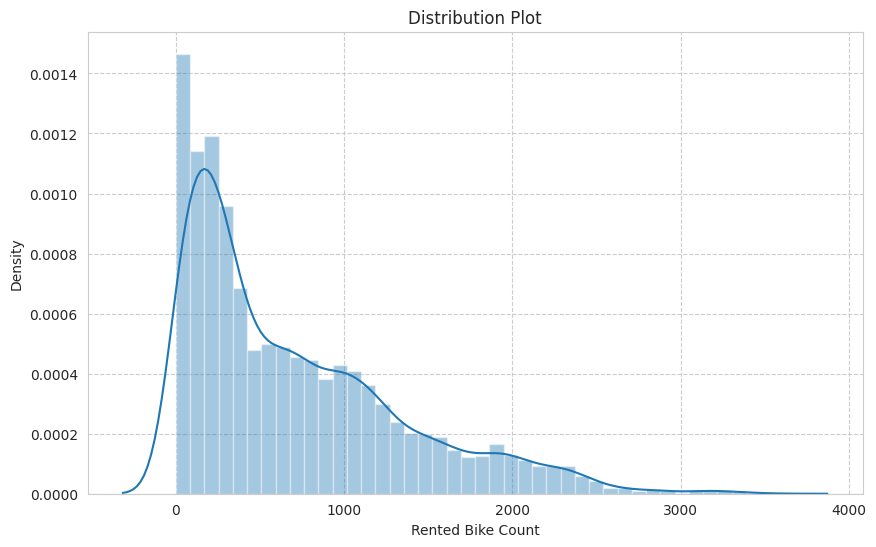

In [ ]:
# Distribution plot of the "Rented Bike Count" column
plt.figure(figsize=(10, 6))
sns.distplot(bike_df["Rented Bike Count"], kde=True)
plt.title("Distribution Plot")

In [ ]:
# Check the skewness score of the "Rented Bike Count" column
bike_df["Rented Bike Count"].skew()

1.1534281773679014

The "Rented Bike Count" column exhibits positive skewness, indicated by a skewness score greater than 1. Positive skewness suggests that the distribution of bike rental counts is skewed towards higher values. To address this skewness and achieve a more symmetrical distribution, let's apply transformation techniques.

Here are some methods commonly used to address skewness:

* Square-root transformation: (for moderately skewed data) For positively skewed data, we can apply the square root transformation using sqrt(x), and for negatively skewed data, we can use sqrt(max(x+1) - x).

* Log transformation: (for reducing greater skewness) For positively skewed data, we can apply the log transformation using log10(x), and for negatively skewed data, we can use log10(max(x+1) - x).

* Inverse transformation: (for severely skewed data) For positively skewed data, we can apply the inverse transformation using 1/x, and for negatively skewed data, we can use 1/(max(x+1) - x).

Since we have a moderately skewed data, let's apply the square-root transformation method.

Text(0.5, 1.0, 'Distribution plot')

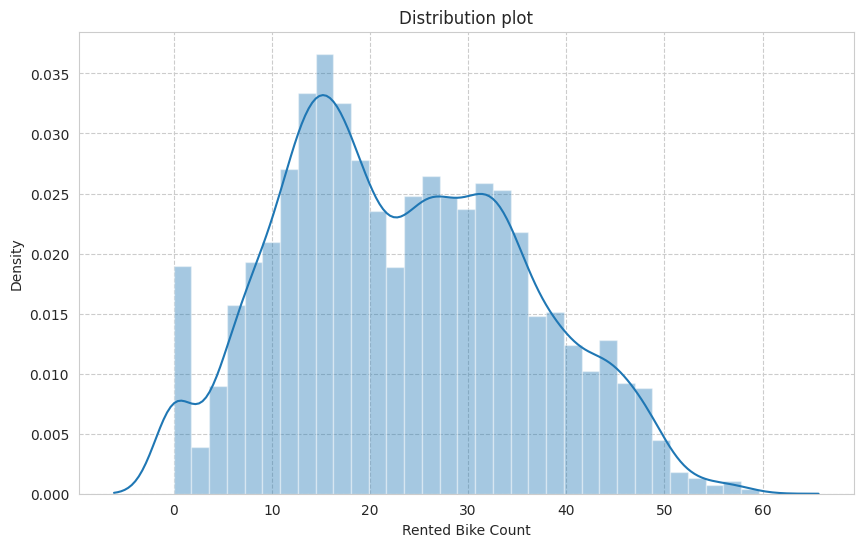

In [ ]:
# Apply square-root transformation and plot the distribution
plt.figure(figsize=(10, 6))
sns.distplot(np.sqrt(bike_df["Rented Bike Count"]), kde=True)
plt.title("Distribution plot")

In [ ]:
# Check the skewness score after applying square-root transformation
np.sqrt(bike_df["Rented Bike Count"]).skew()

0.237362090985412

The distribution looks almost normal now!

Text(0.5, 1.0, 'Boxplot')

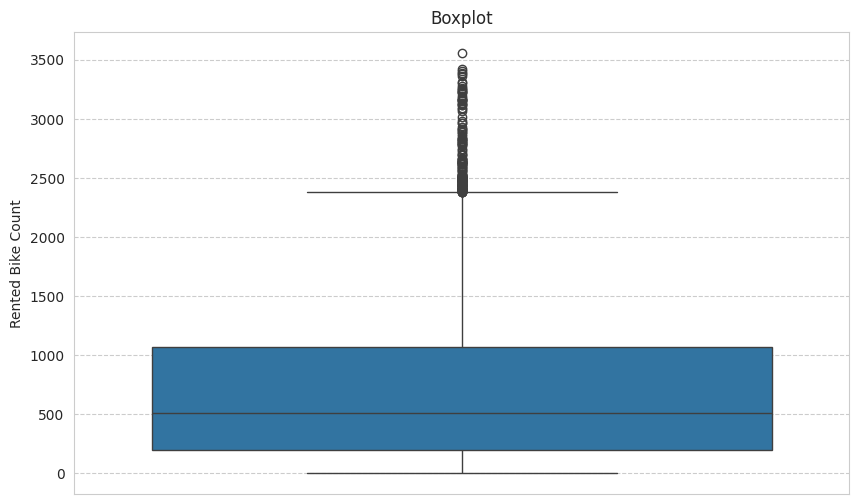

In [ ]:
# Create a boxplot to identify outliers in the "Rented Bike Count" column
plt.figure(figsize=(10, 6))
sns.boxplot(y=bike_df["Rented Bike Count"])
plt.title("Boxplot")

The median value for the 'Rented Bike Count' is 500, and there are some outliers present in the dataset. To visualize the boxplot without displaying the outliers, let's use the 'showfliers' parameter and set it to 'False'.

Text(0.5, 1.0, 'Boxplot Without Outliers')

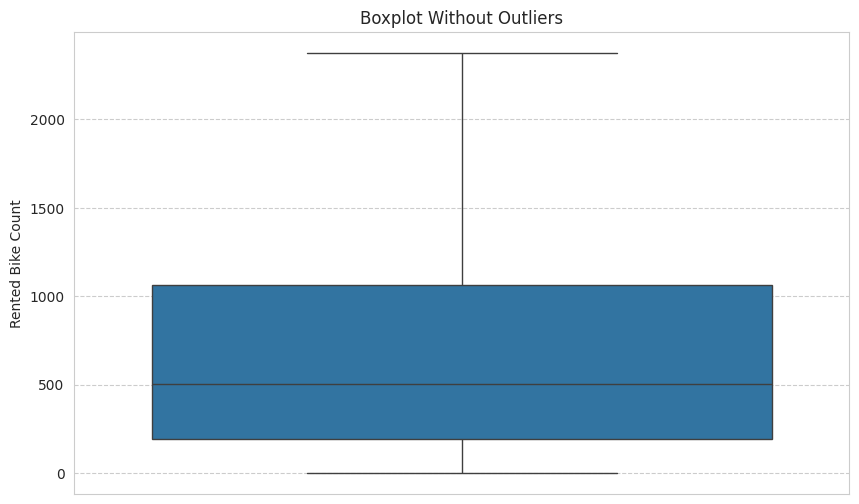

In [ ]:
# Create a boxplot without outliers for the "Rented Bike Count" column
plt.figure(figsize=(10, 6))
sns.boxplot(y=bike_df["Rented Bike Count"], showfliers=False)
plt.title("Boxplot Without Outliers")

#### Independent Variables

In [ ]:
# Create a list of numerical variables
numerical_variables = list(bike_df.describe().columns[1:])

# Display the list of numerical variables
numerical_variables

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [ ]:
# Display summary statistics for numerical features
bike_df[numerical_variables].describe()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count  8760.000000      8760.000000  8760.000000       8760.000000   
mean     11.500000        12.882922    58.226256          1.724909   
std       6.922582        11.944825    20.362413          1.036300   
min       0.000000       -17.800000     0.000000          0.000000   
25%       5.750000         3.500000    42.000000          0.900000   
50%      11.500000        13.700000    57.000000          1.500000   
75%      17.250000        22.500000    74.000000          2.300000   
max      23.000000        39.400000    98.000000          7.400000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       8760.000000                8760.000000              8760.000000   
mean        1436.825799                   4.073813                 0.569111   
std          608.298712                  13.060369                 0.868746   
min           27.000000                 -30.600000                 0.000000   
25%          940.000000                  -4.700000                 0.000000   
50%         1698.000000                   5.100000                 0.010000   
75%         2000.000000                  14.800000                 0.930000   
max         2000.000000                  27.200000                 3.520000   

       Rainfall(mm)  Snowfall (cm)          Day        Month  
count   8760.000000    8760.000000  8760.000000  8760.000000  
mean       0.148687       0.075068    15.720548     6.526027  
std        1.128193       0.436746     8.796749     3.448048  
min        0.000000       0.000000     1.000000     1.000000  
25%        0.000000       0.000000     8.000000     4.000000  
50%        0.000000       0.000000    16.000000     7.000000  
75%        0.000000       0.000000    23.000000    10.000000  
max       35.000000       8.800000    31.000000    12.000000

As these are numerical columns, let's use histogram visualisation to understand their distribution.

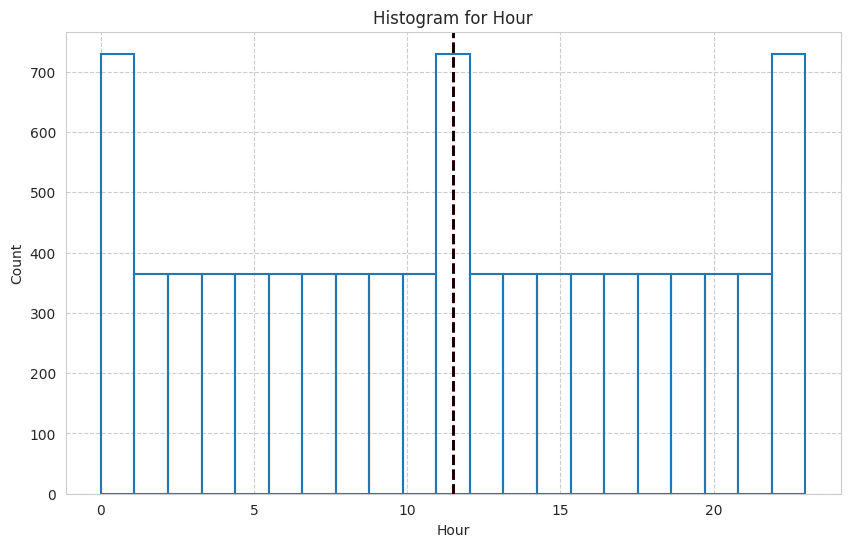

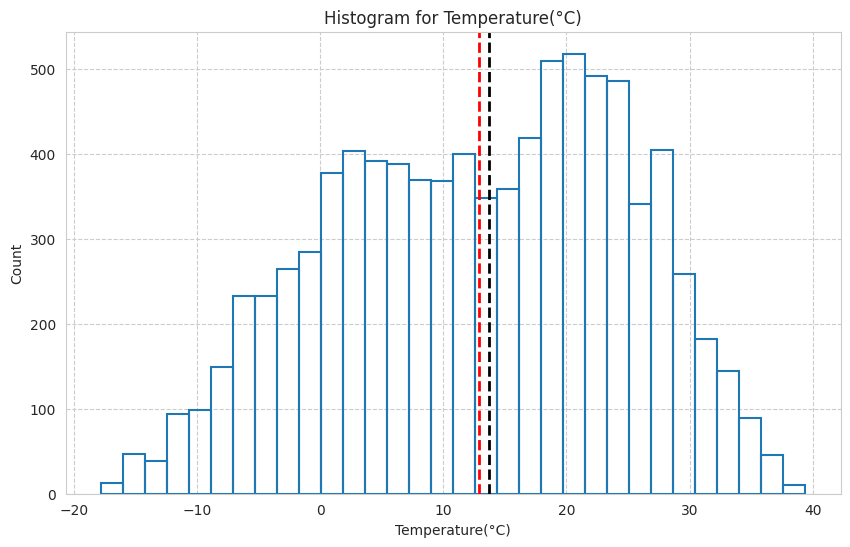

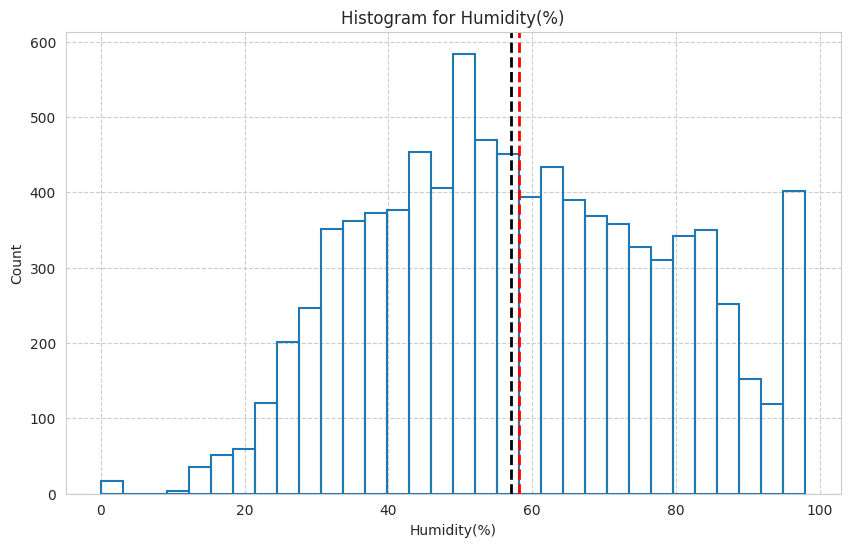

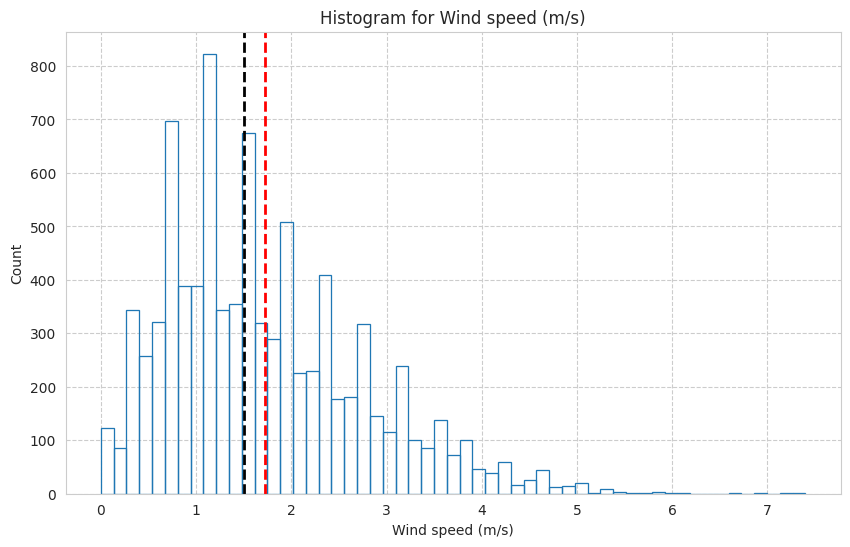

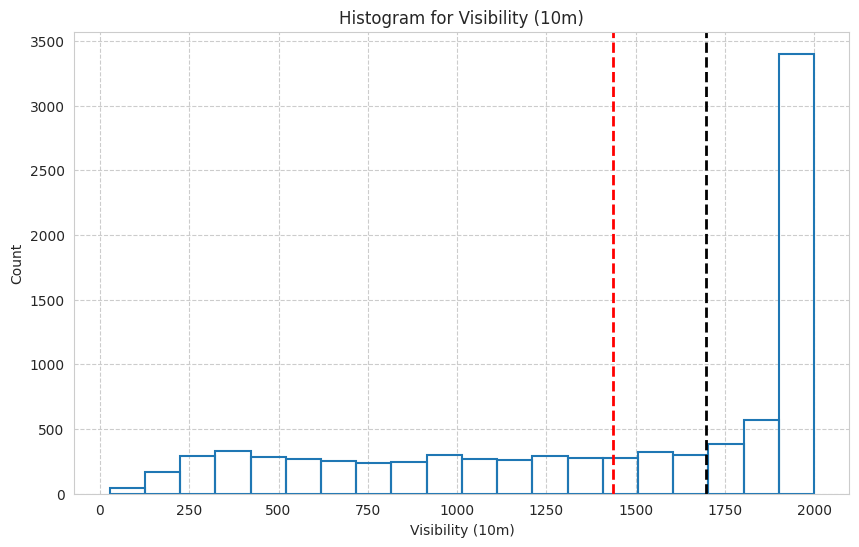

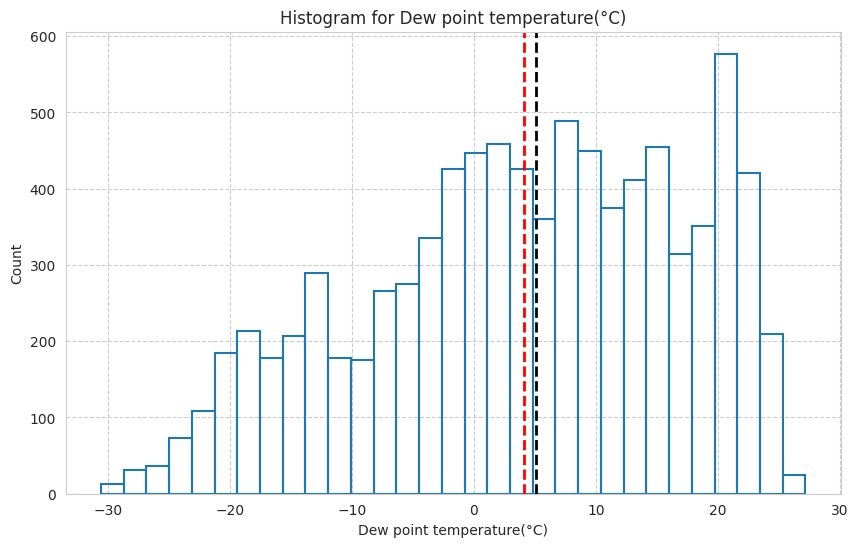

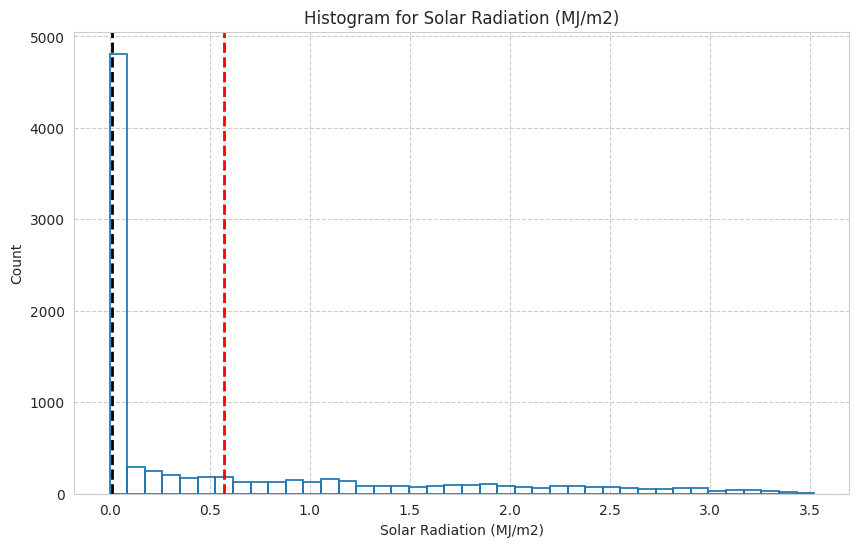

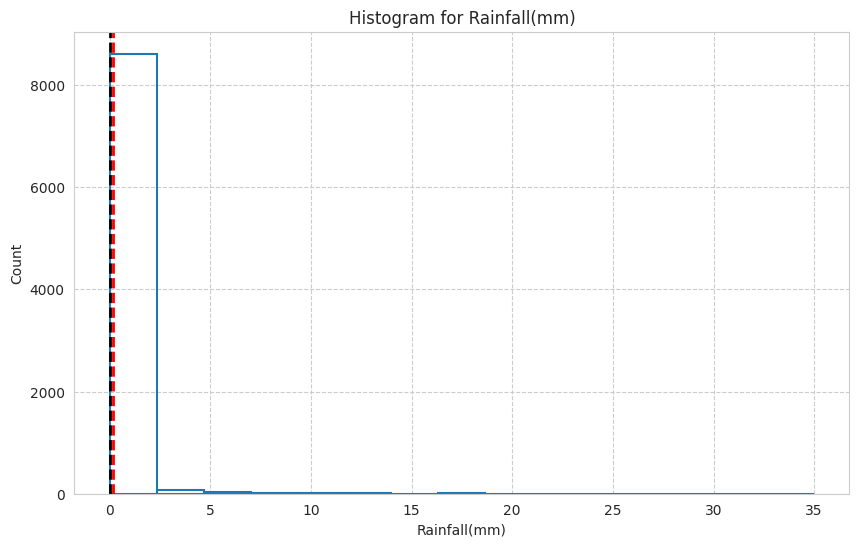

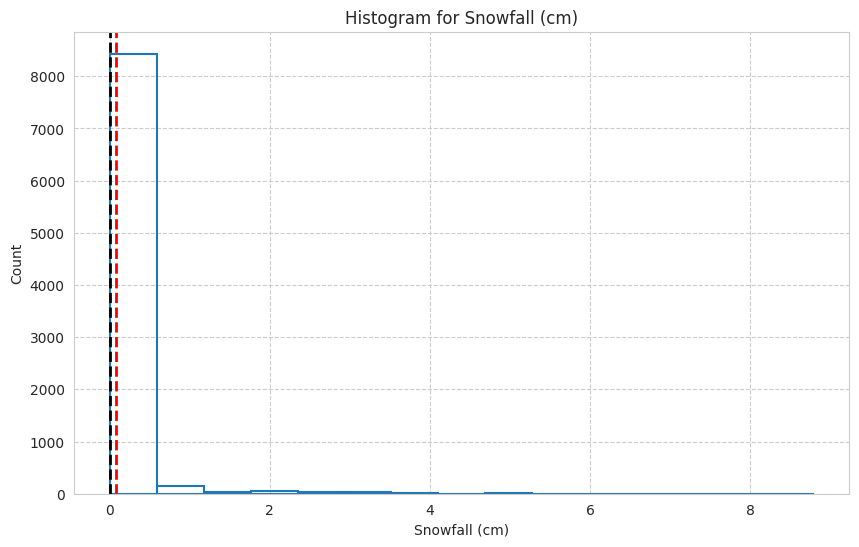

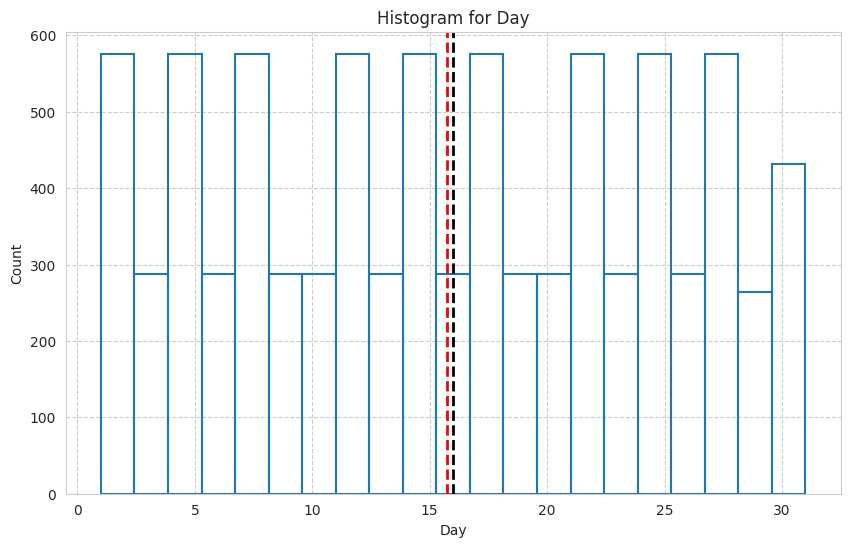

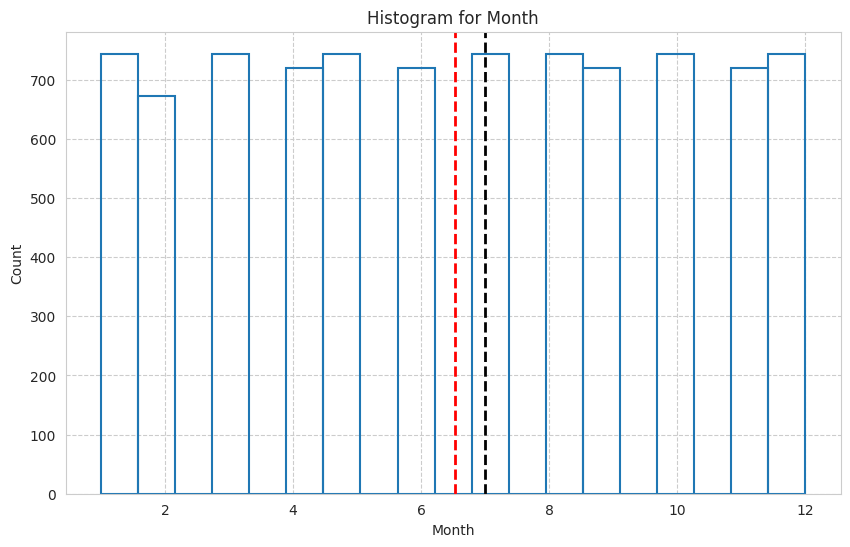

In [ ]:
# Plot histogram for each numerical feature count
for column in numerical_variables:
    num_feature = bike_df[column]
    plt.figure(figsize=(10,6))
    sns.histplot(num_feature, fill=False)
    plt.axvline(num_feature.mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(num_feature.median(), color='black', linestyle='dashed', linewidth=2)
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Variables such as 'Wind Speed', 'Solar Radiation', 'Rainfall', and 'Snowfall' exhibit positively skewed distributions, indicating that their data tends to be concentrated towards lower values with a tail extending towards higher values.

On the other hand, the distribution of 'Visibility' is negatively skewed, suggesting that its data is concentrated towards higher values with a tail extending towards lower values.

Let's use a Boxplot to find out the outliers present in these features.

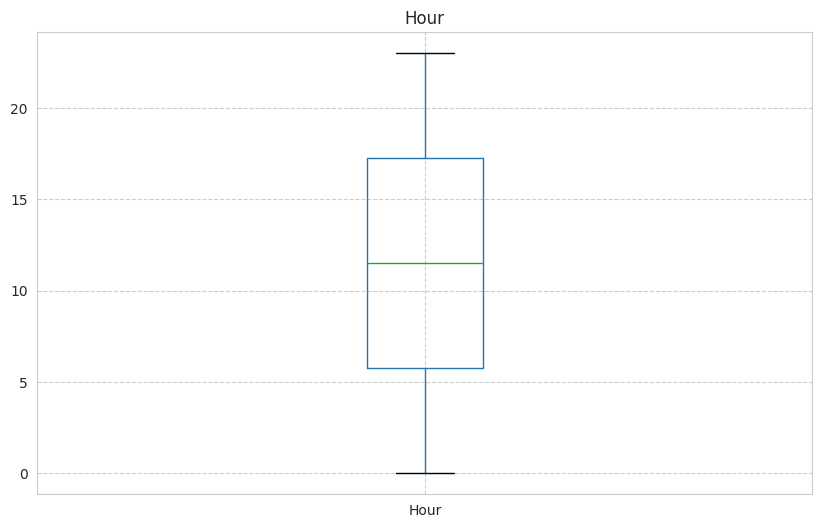

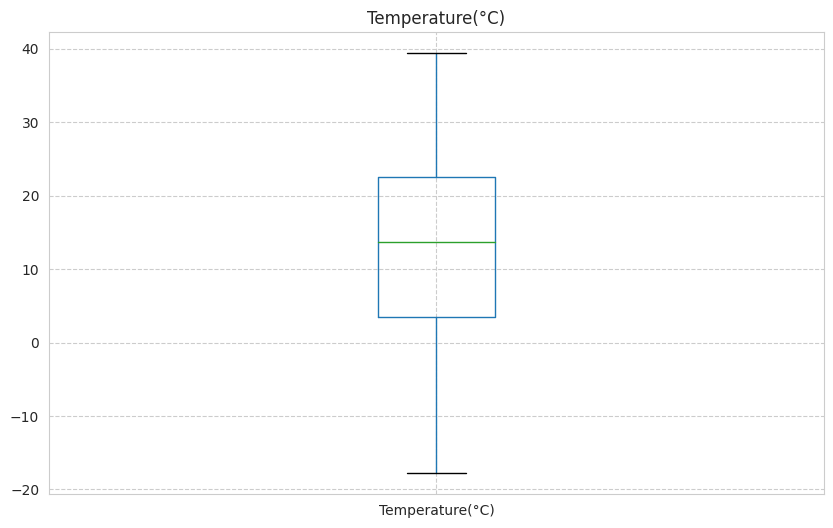

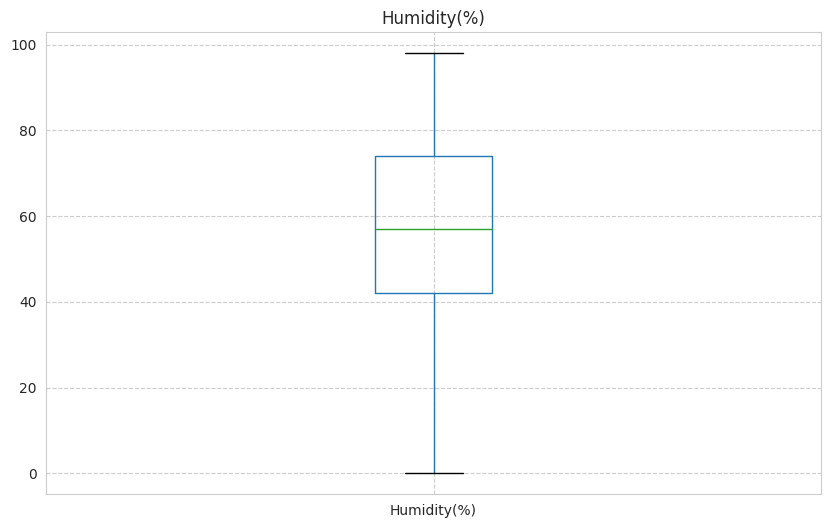

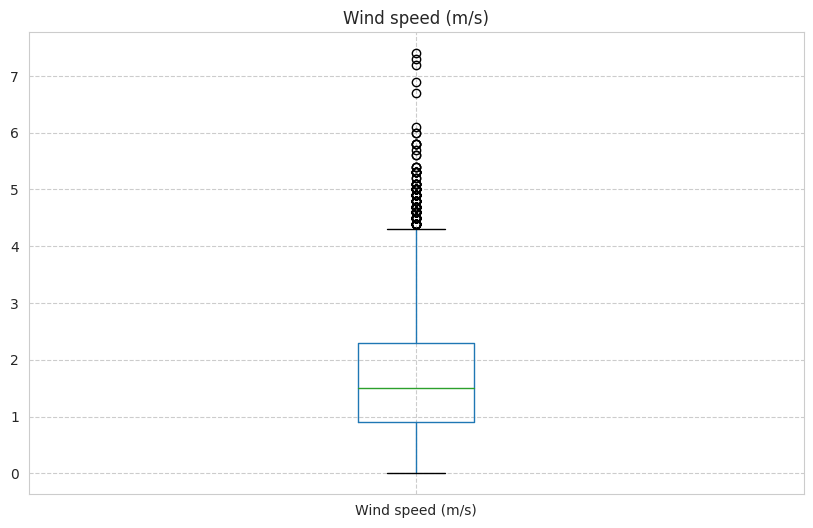

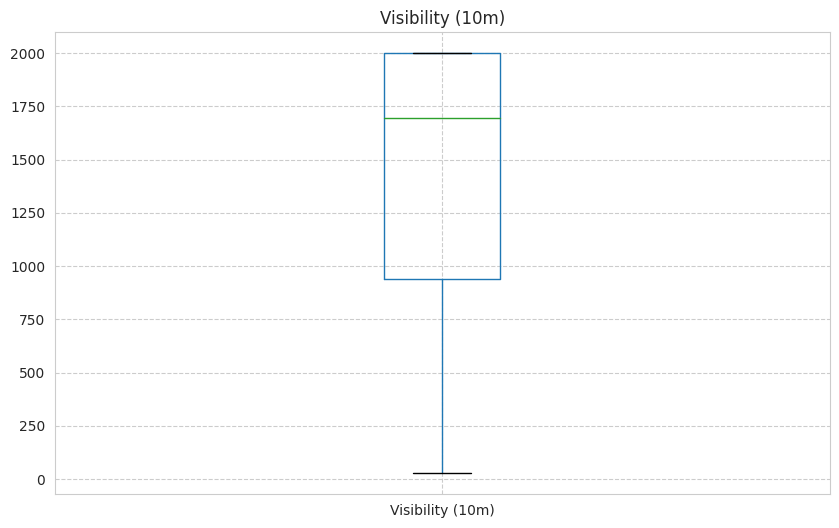

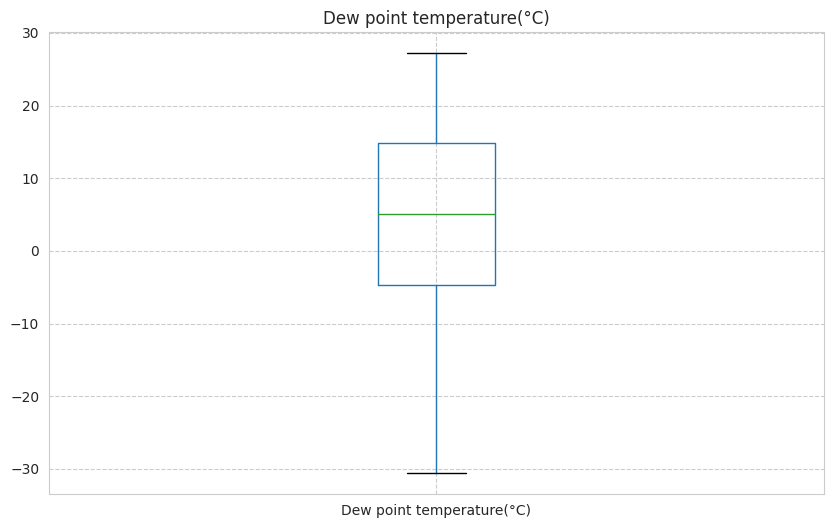

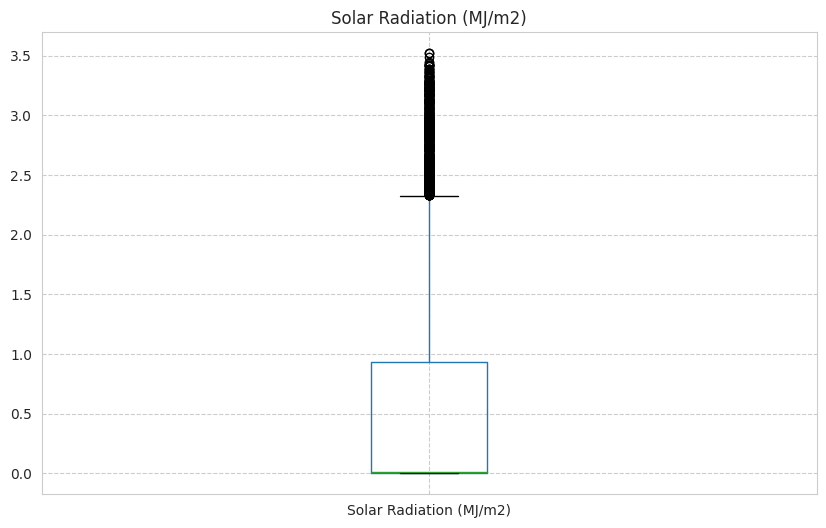

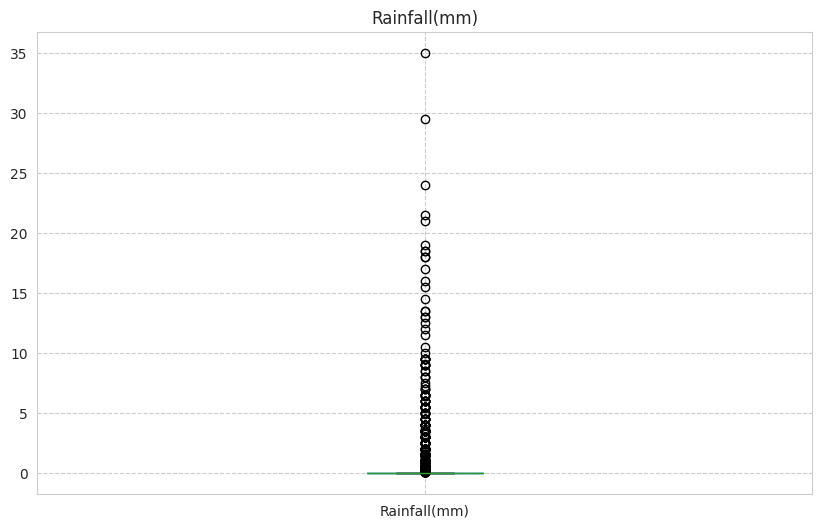

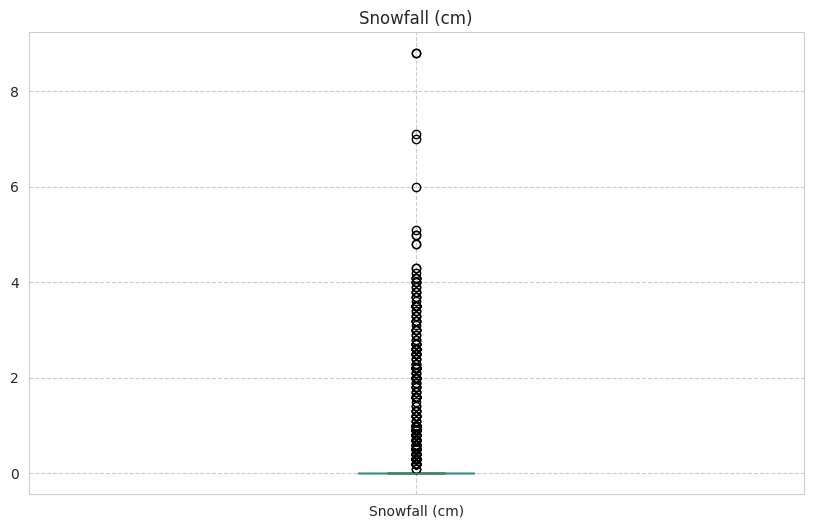

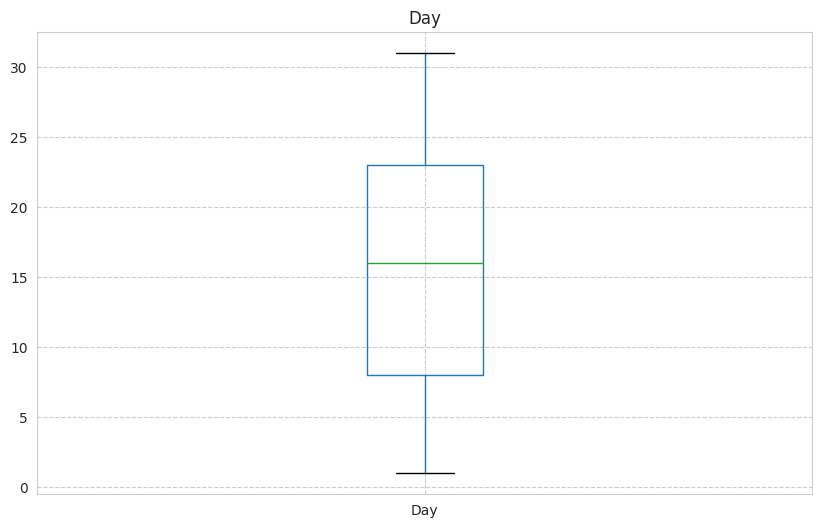

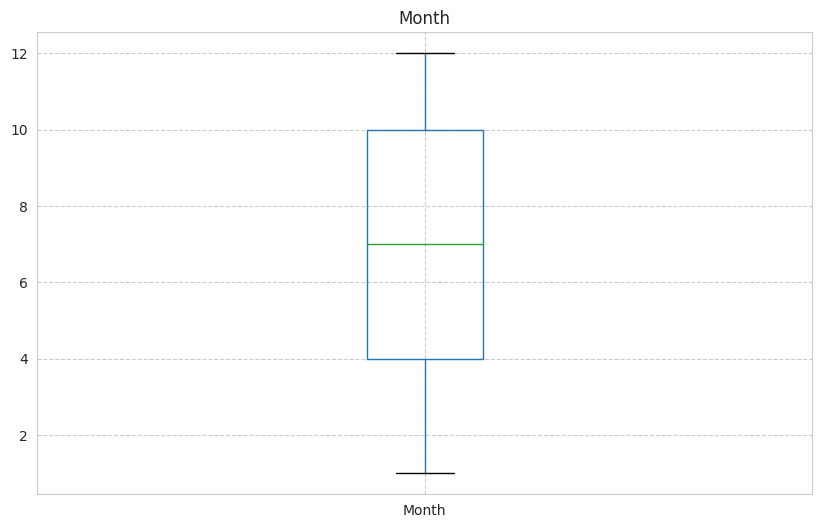

In [ ]:
# Boxplot for each numerical feature
for column in numerical_variables:
    figure = plt.figure(figsize=(10,6))
    ax = figure.gca()
    bike_df.boxplot(column, ax=ax)
    ax.set_title(column)
plt.show()

Variables like wind speed, solar radiation, rainfall, and snowfall exhibit outliers, as observed in the boxplot. These outliers can be addressed using various transformation techniques.

#### Categorical Variables

In [ ]:
# Create a list of categorical variables
categorical_variables = bike_df.select_dtypes(include="object")
categorical_variables

Seasons     Holiday Functioning Day Day_of_Week
0     Winter  No Holiday             Yes      Friday
1     Winter  No Holiday             Yes      Friday
2     Winter  No Holiday             Yes      Friday
3     Winter  No Holiday             Yes      Friday
4     Winter  No Holiday             Yes      Friday
...      ...         ...             ...         ...
8755  Autumn  No Holiday             Yes      Friday
8756  Autumn  No Holiday             Yes      Friday
8757  Autumn  No Holiday             Yes      Friday
8758  Autumn  No Holiday             Yes      Friday
8759  Autumn  No Holiday             Yes      Friday

[8760 rows x 4 columns]

In [ ]:
# Find unique values in the "Seasons" column
unique_seasons = list(bike_df['Seasons'].unique())

# Print the unique values
print(unique_seasons)

['Winter', 'Spring', 'Summer', 'Autumn']


In [ ]:
# Find unique values in the "Holiday" column
unique_holidays = list(bike_df['Holiday'].unique())

# Print the unique values
print(unique_holidays)

['No Holiday', 'Holiday']


In [ ]:
# Find unique values in the "Functioning Day" column
unique_functioning_days = list(bike_df['Functioning Day'].unique())

# Print the unique values
print(unique_functioning_days)

['Yes', 'No']


In [ ]:
# Find unique values in the "Day_of_week" column
unique_days_of_week = list(bike_df['Day_of_Week'].unique())

# Print the unique values
print(unique_days_of_week)

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']


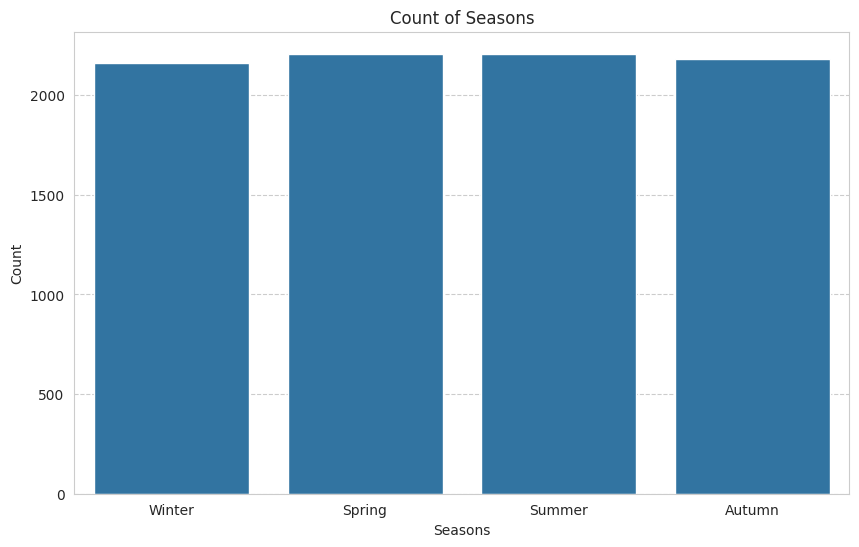

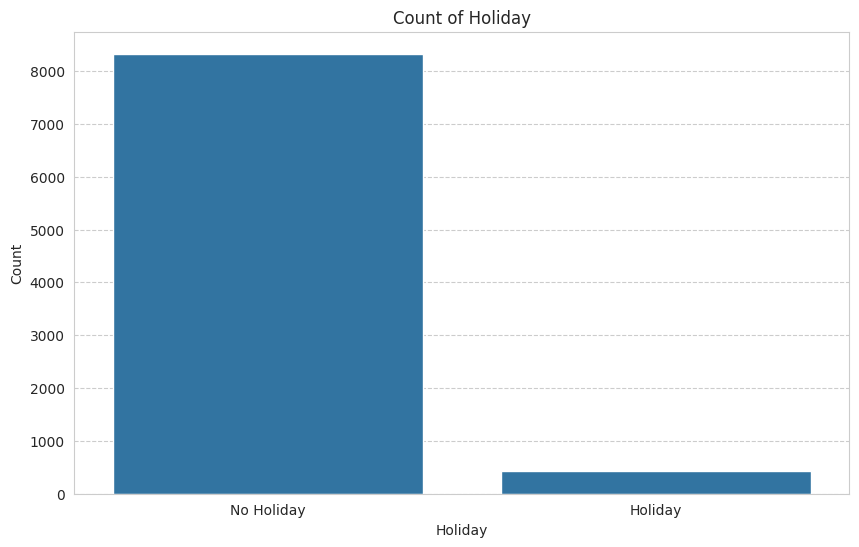

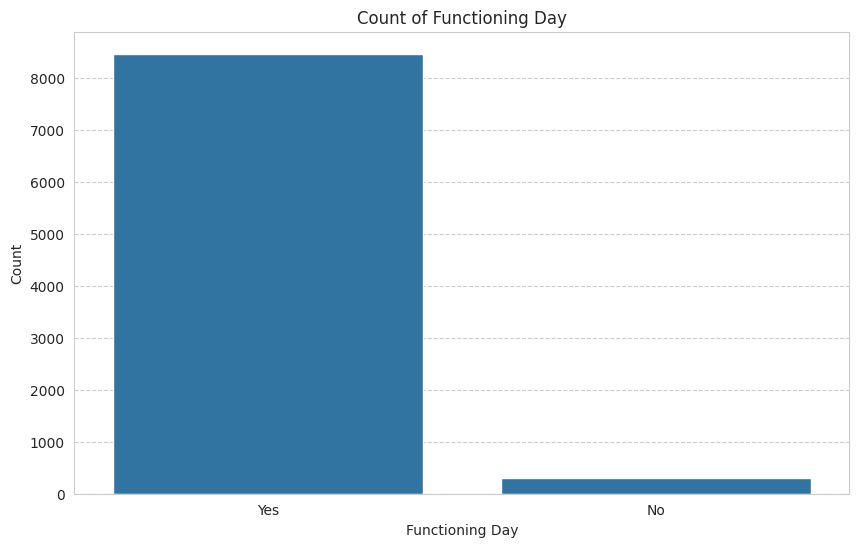

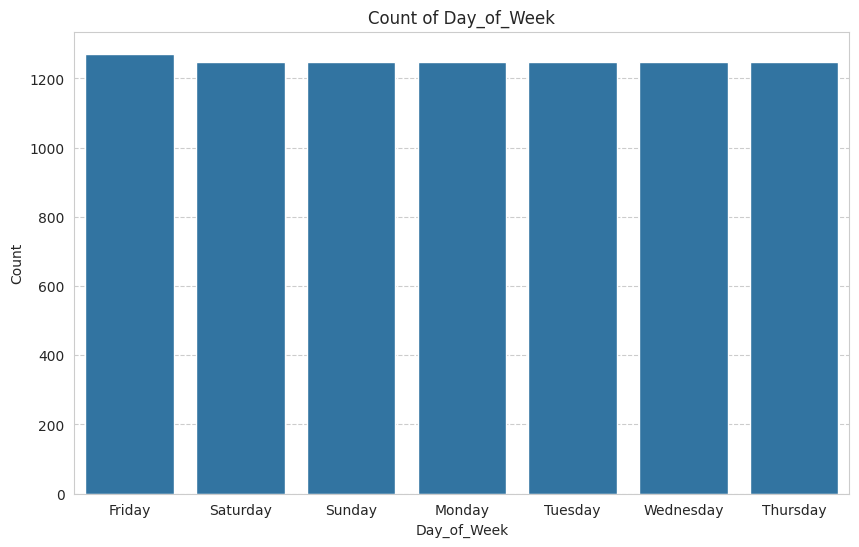

In [ ]:
# Countplot for each categorical variable
for column in list(categorical_variables):
    plt.figure(figsize=(10,6))
    sns.countplot(data=bike_df, x=column)
    plt.title(f"Count of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Across all seasons, it appears that each weekday is typically operational, with very few instances of holidays or non-functional days. Additionally, the count of days without holidays is notably larger compared to the count of holiday days.

### Bivariate Analysis

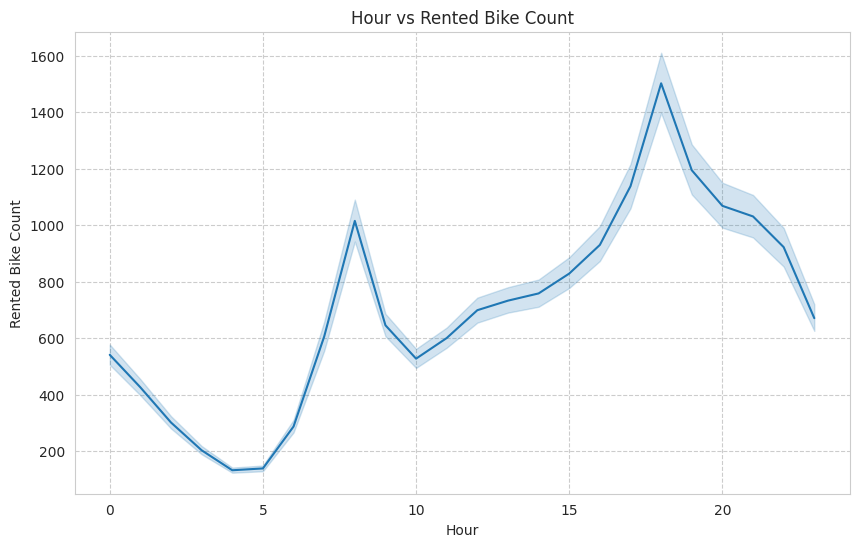

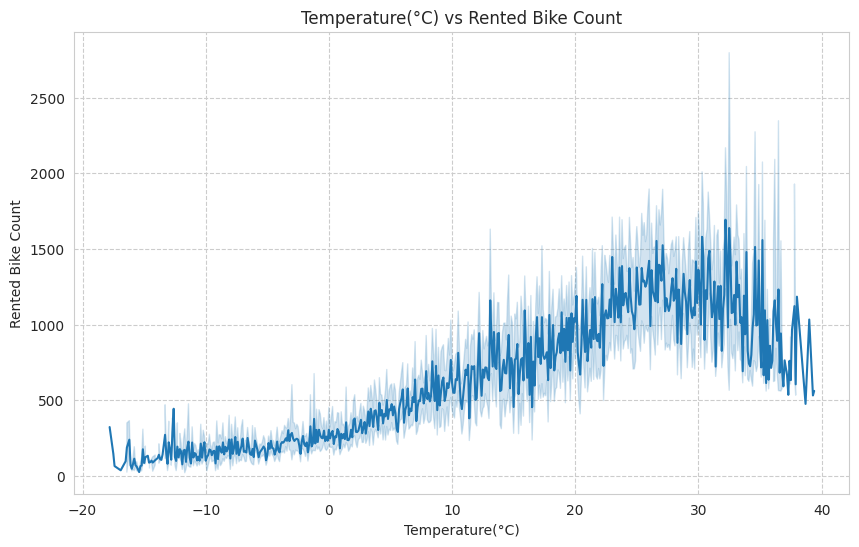

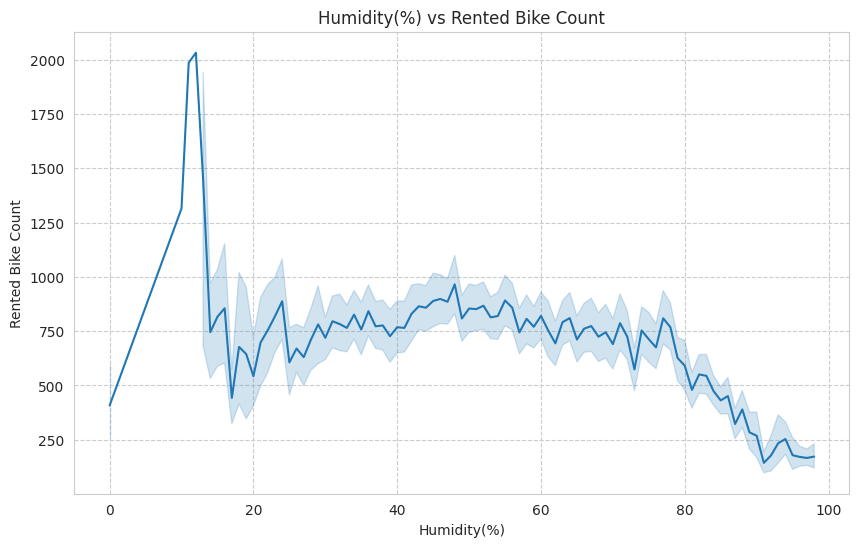

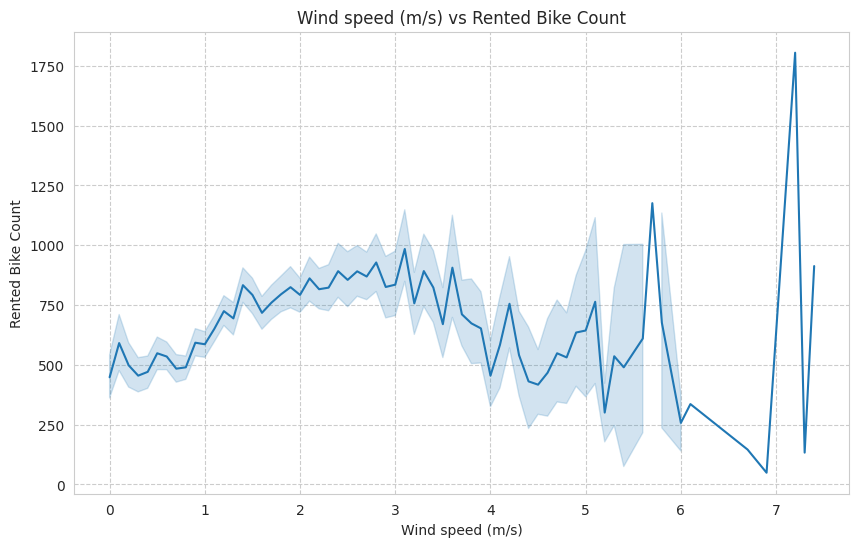

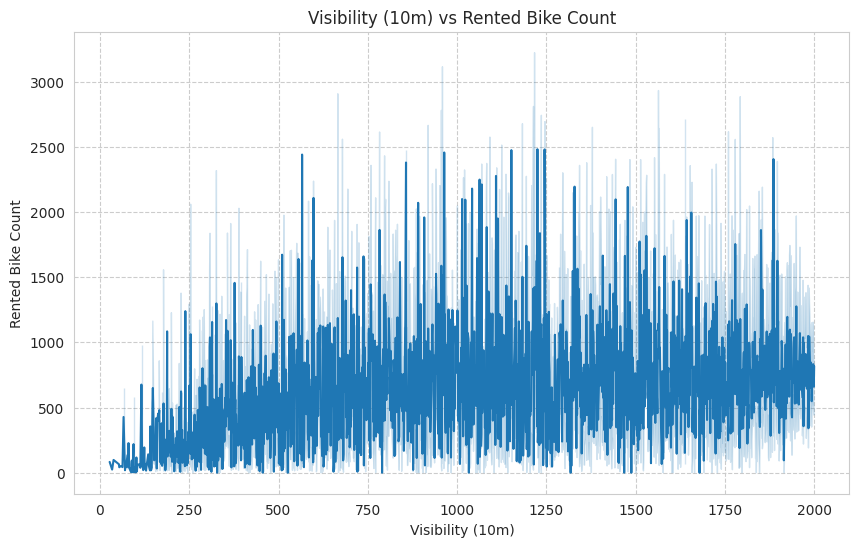

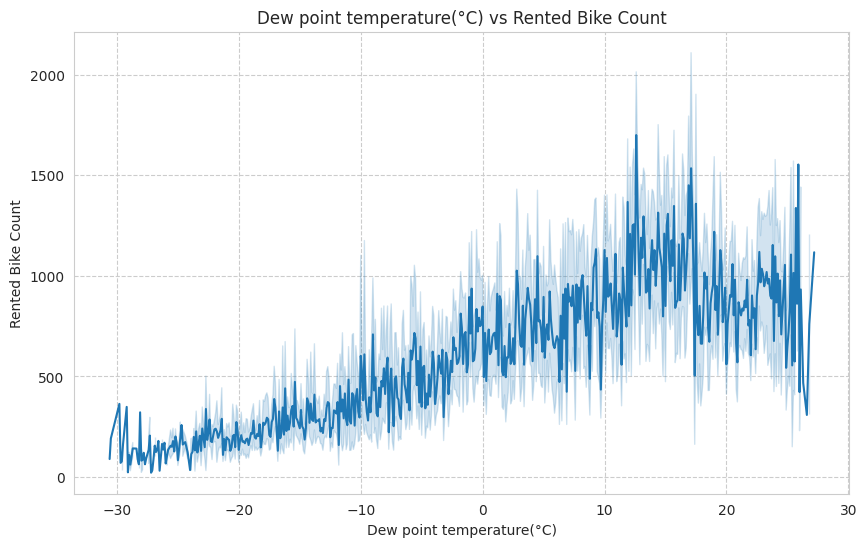

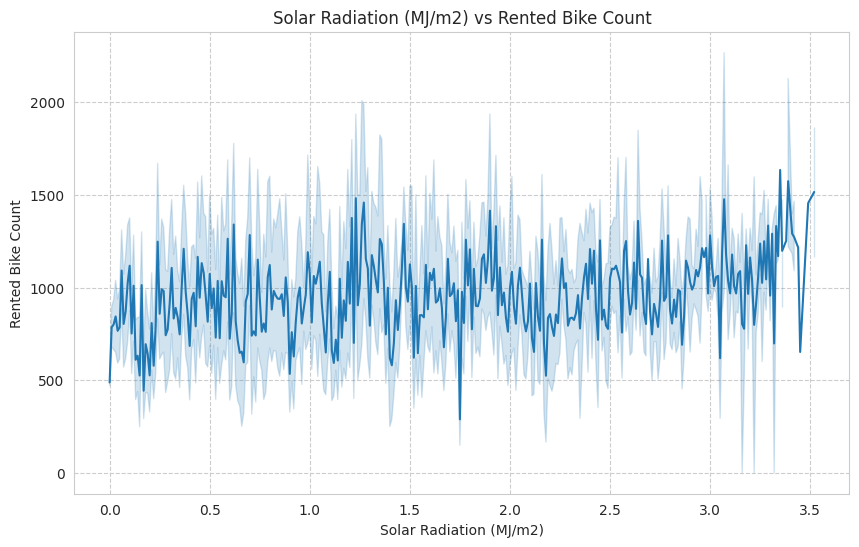

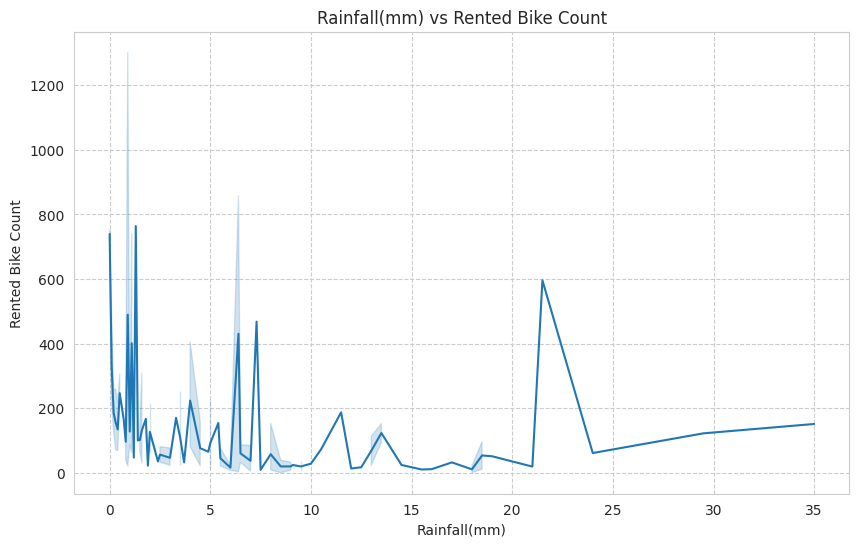

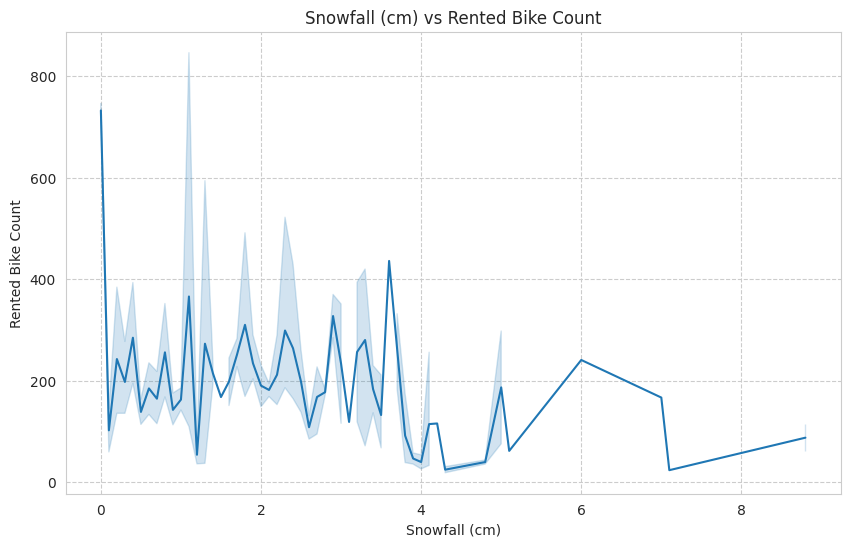

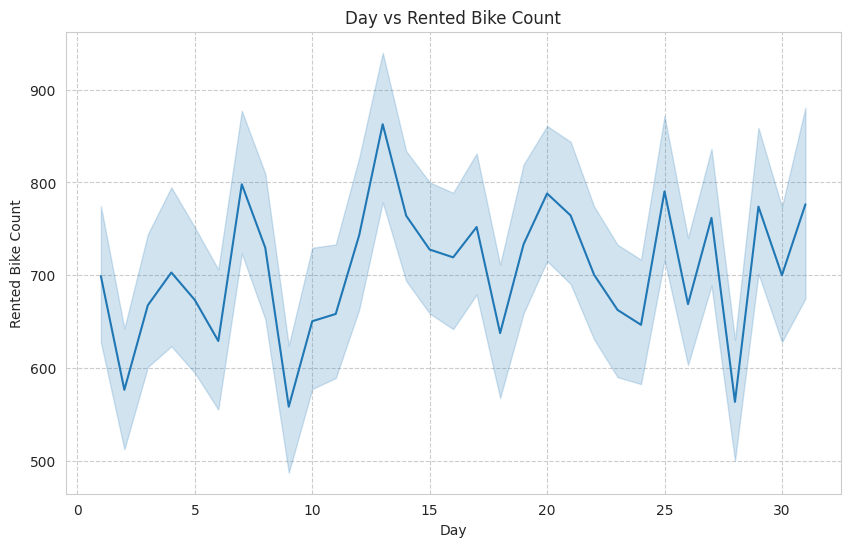

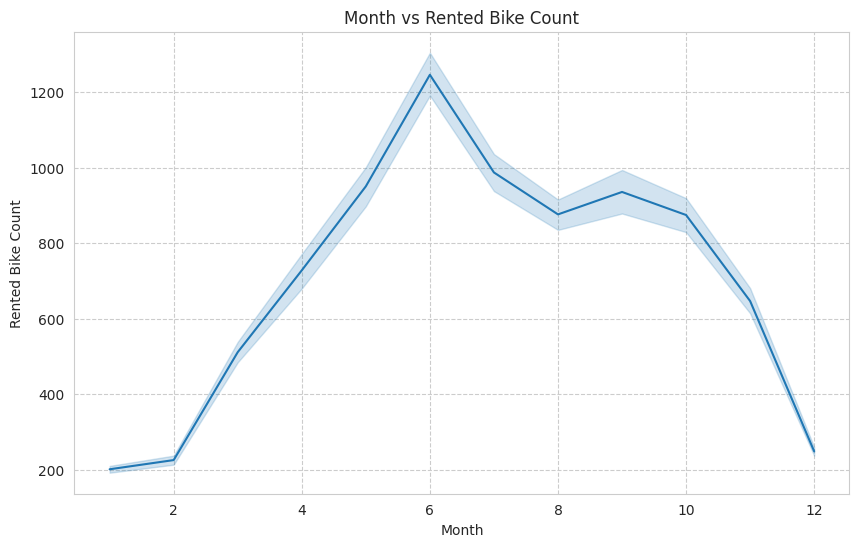

In [ ]:
# Line plot for each numerical variable against "Rented Bike Count"
for column in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=column, y='Rented Bike Count', data=bike_df, palette='Grouped')
    plt.title(f"{column} vs Rented Bike Count")
    plt.xlabel(column)
    plt.ylabel("Rented Bike Count")
    plt.show()

Here are some key observations that we found out -

1. Bike rentals peak in the evening, between 3:00 PM and 8:00 PM, coinciding with relatively high temperatures. This suggests that people prefer biking during warmer weather, with an average temperature around 25°C.

2. As humidity and snowfall increase, bike rentals decrease, indicating an inverse relationship between these factors and bike counts.

3. Solar radiation does not seem to have a significant impact on bike rentals.

4. Despite heavy rainfall, the demand for rented bikes remains high. For instance, even with 30 mm of rain, there is a fair number of rented bikes.

5. The count of rented bikes remains relatively constant throughout weekdays, indicating that holidays have little effect on bike rentals.

6. Bike rentals peak in July and decline as temperatures decrease with the onset of winter. During the summer months, bike rentals begin to increase again.

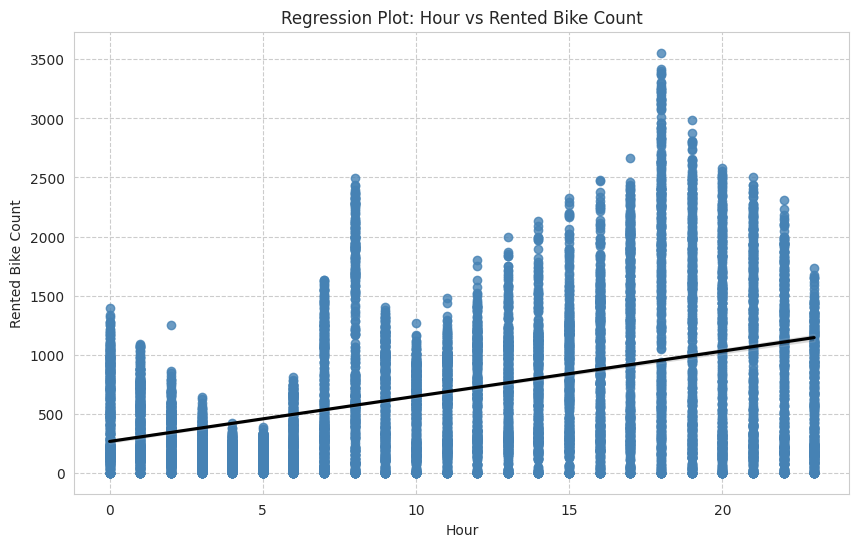

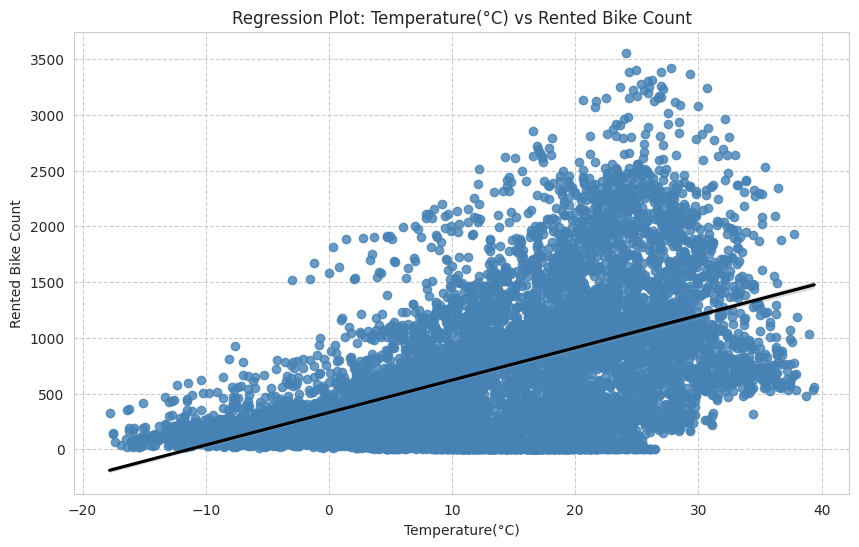

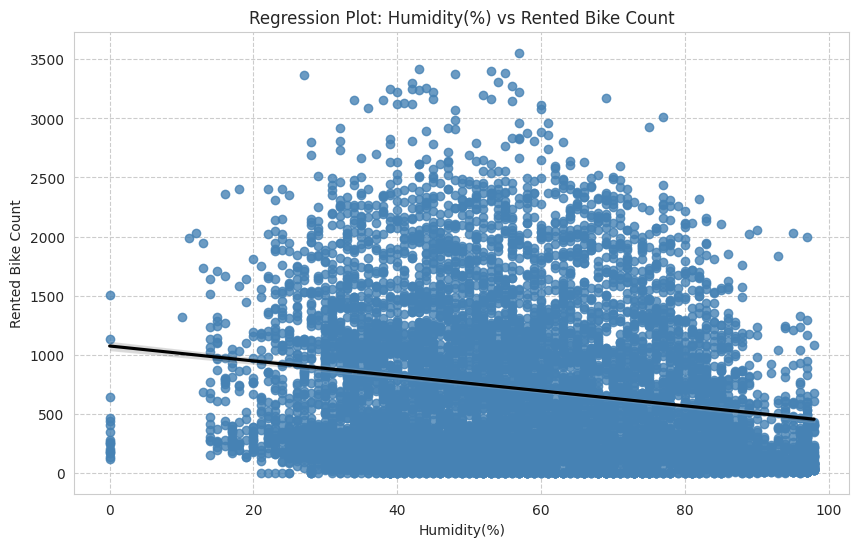

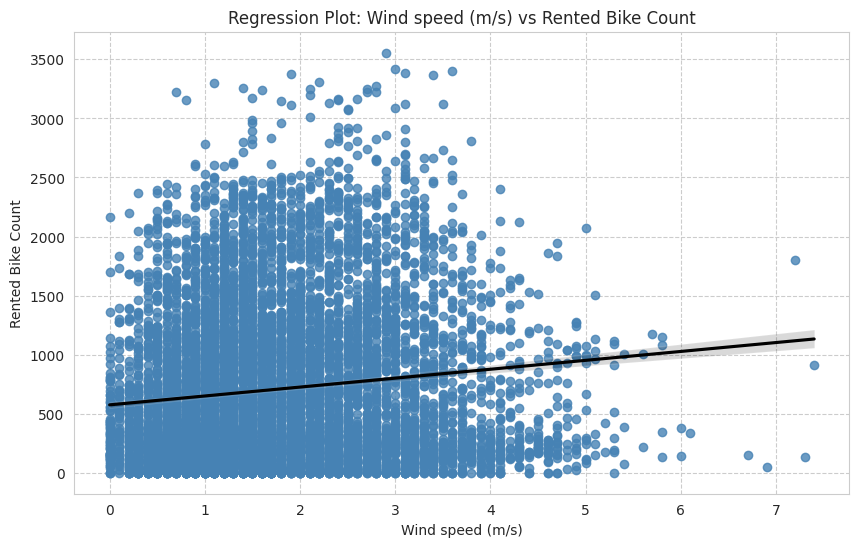

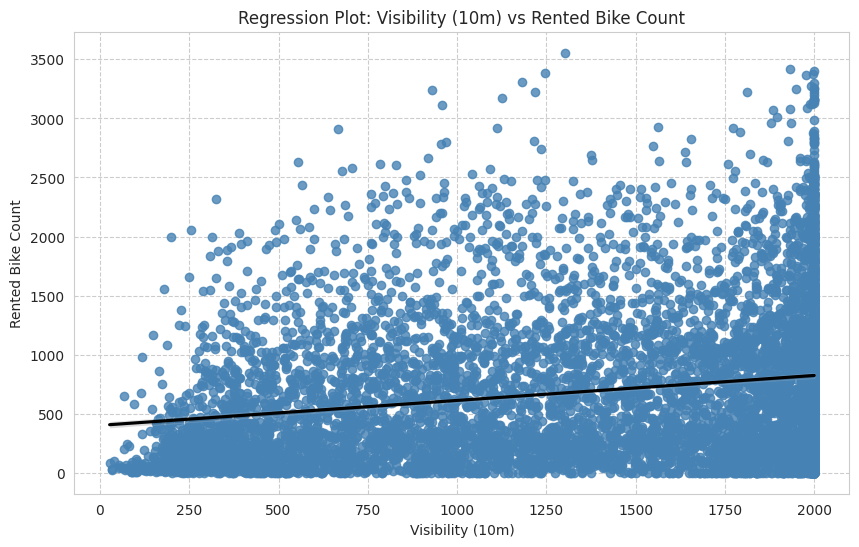

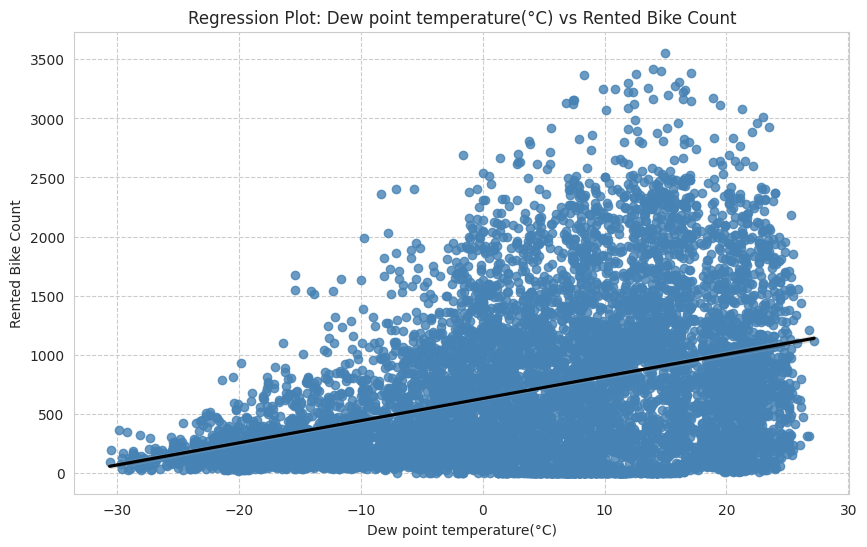

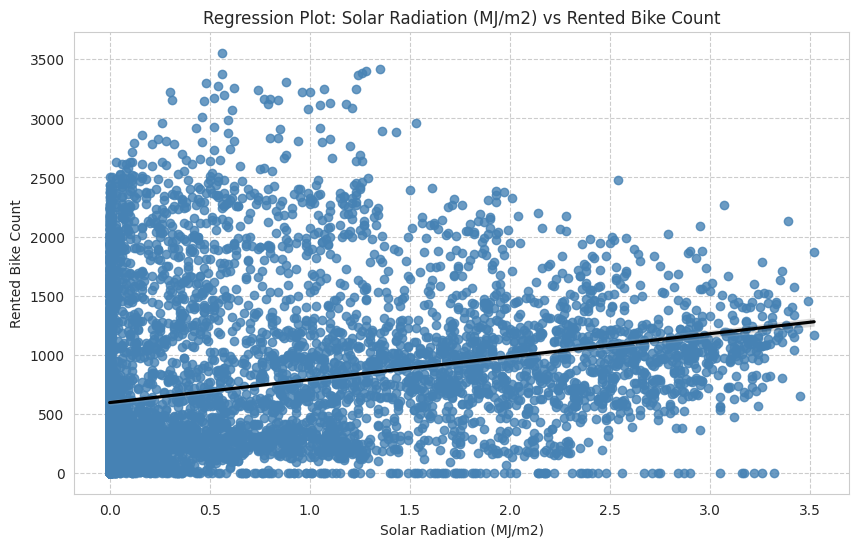

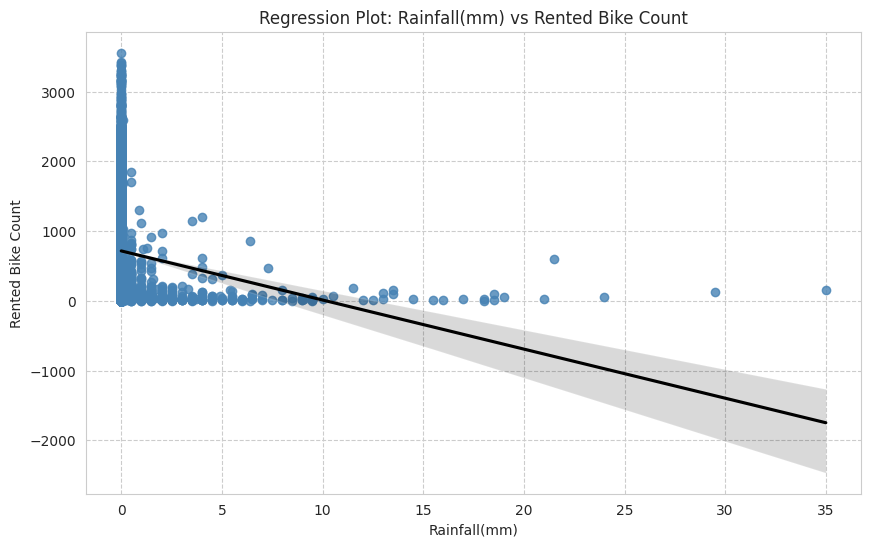

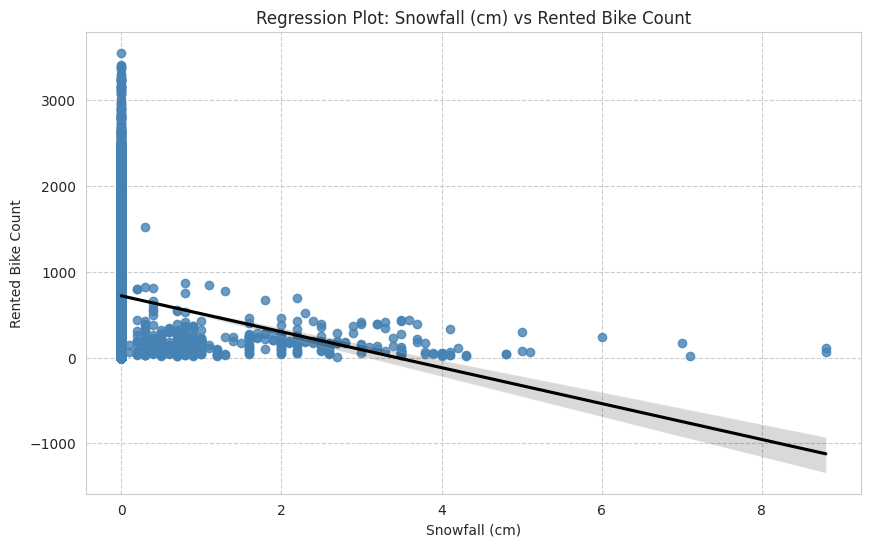

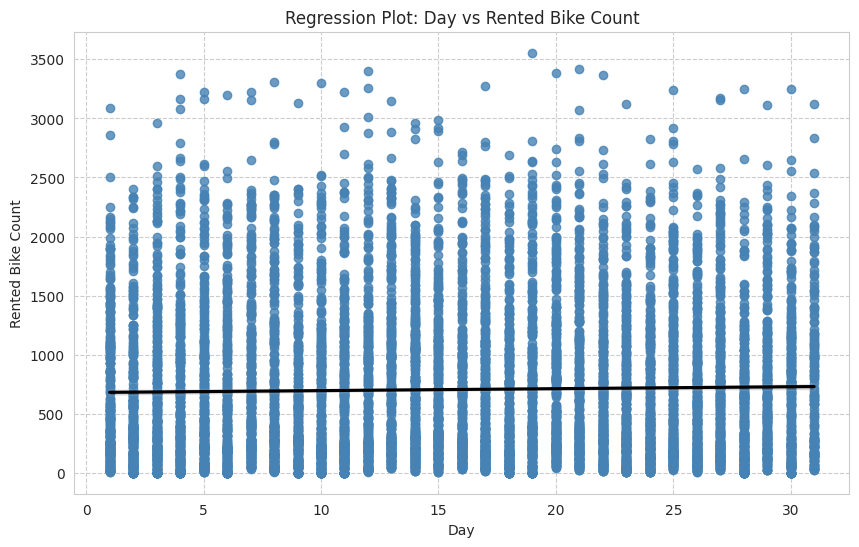

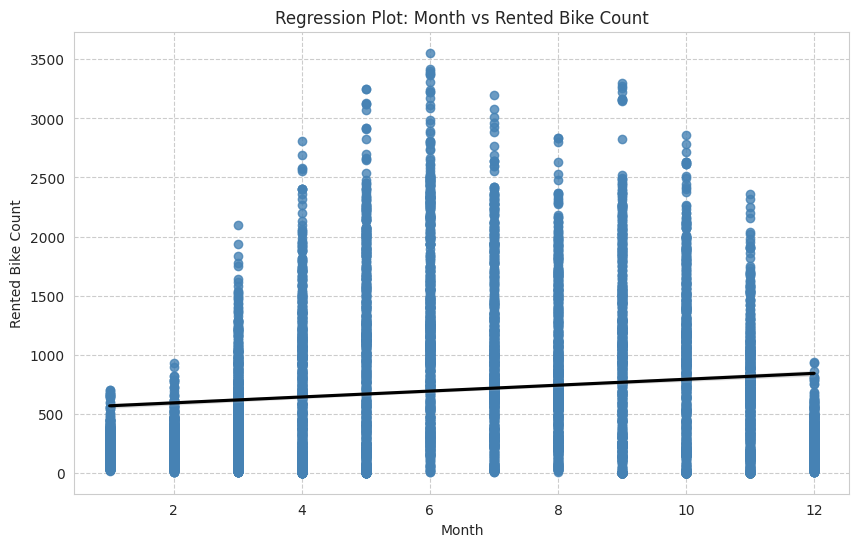

In [ ]:
# Print regression plot for all numerical features to understand their linear relationships
for col in numerical_variables:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.regplot(x=bike_df[col], y=bike_df['Rented Bike Count'], scatter_kws={"color": 'steelblue'}, line_kws={"color": "black"})
    plt.xlabel(col)
    plt.ylabel("Rented Bike Count")
    plt.title(f"Regression Plot: {col} vs Rented Bike Count")
    plt.show()

Observations:

* We notice a positive correlation between the target variable, 'Rented Bike Count', and the following features: 'Temperature', 'Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation', and 'Hour'. This suggests that the count of rented bikes tends to increase as these features increase.

* Conversely, there is a negative correlation between 'Rented Bike Count' and features like 'Rainfall', 'Snowfall', and 'Humidity'. This indicates that the count of rented bikes tends to decrease as these features increase.

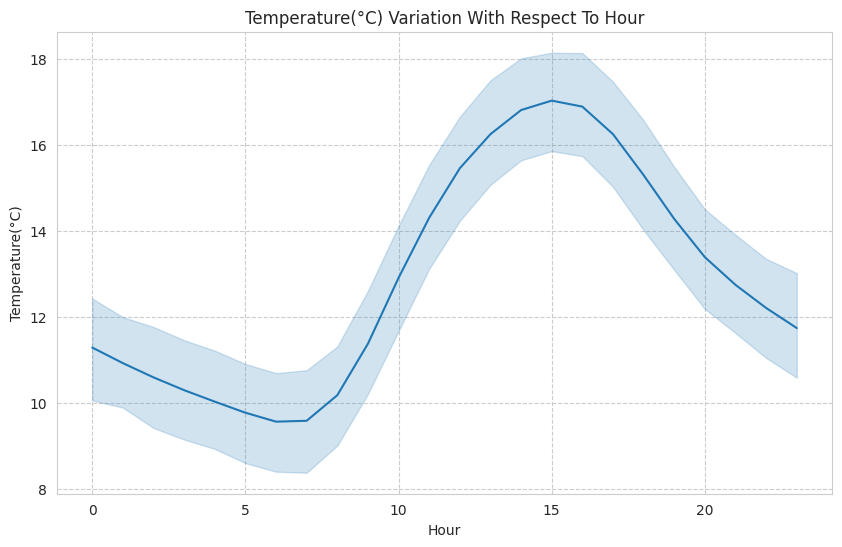

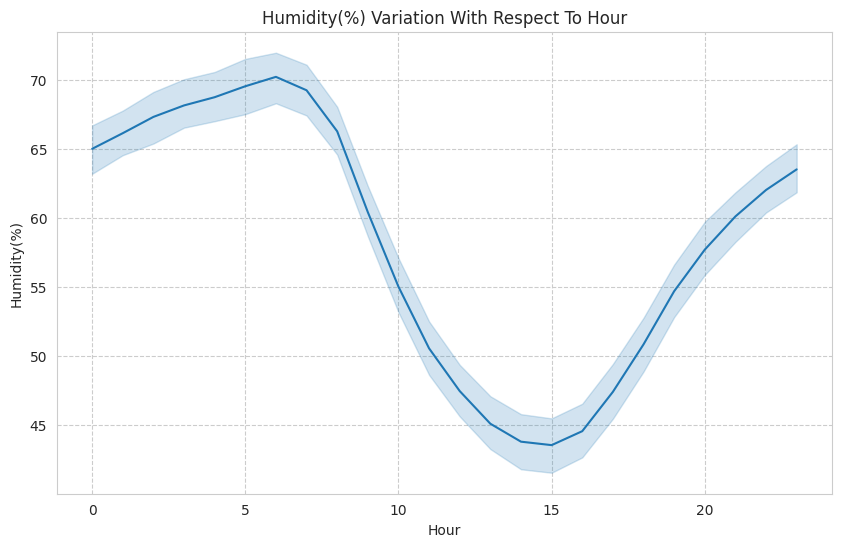

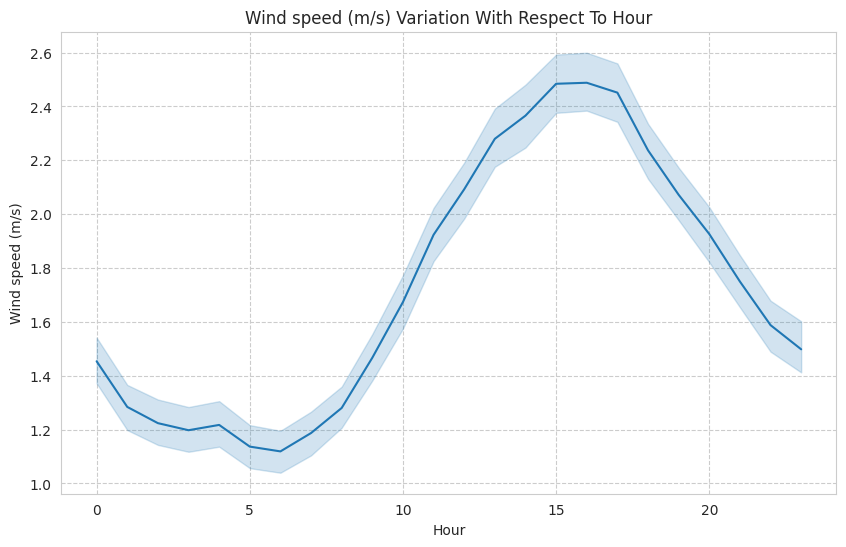

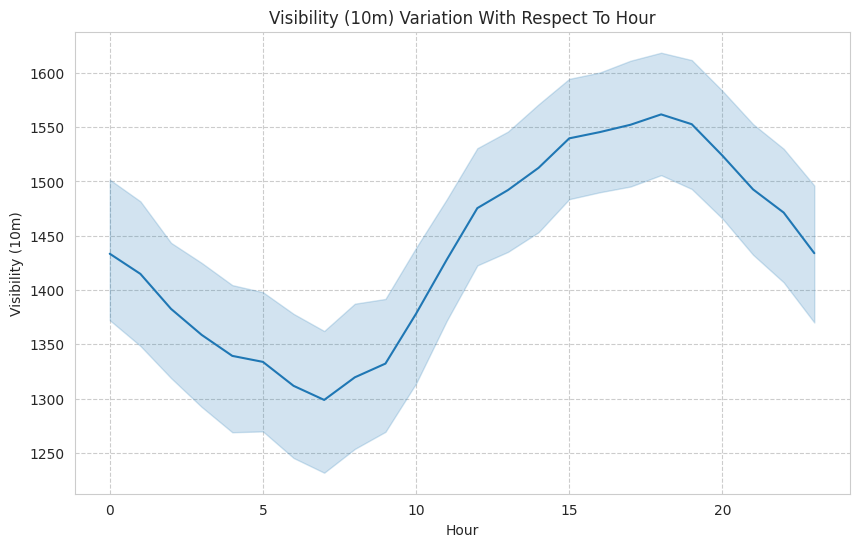

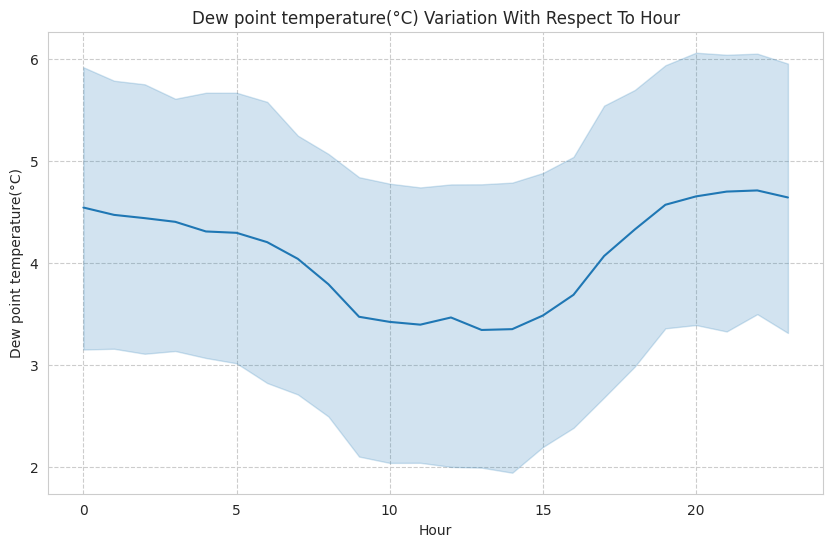

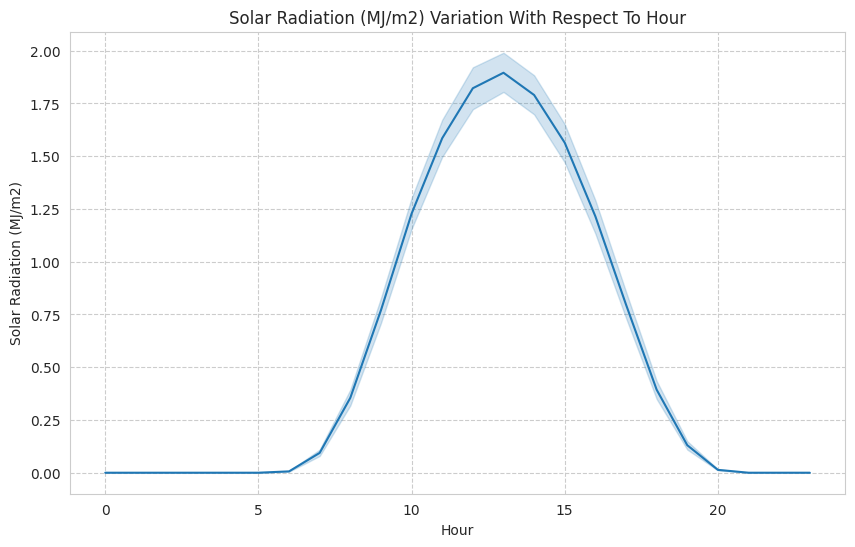

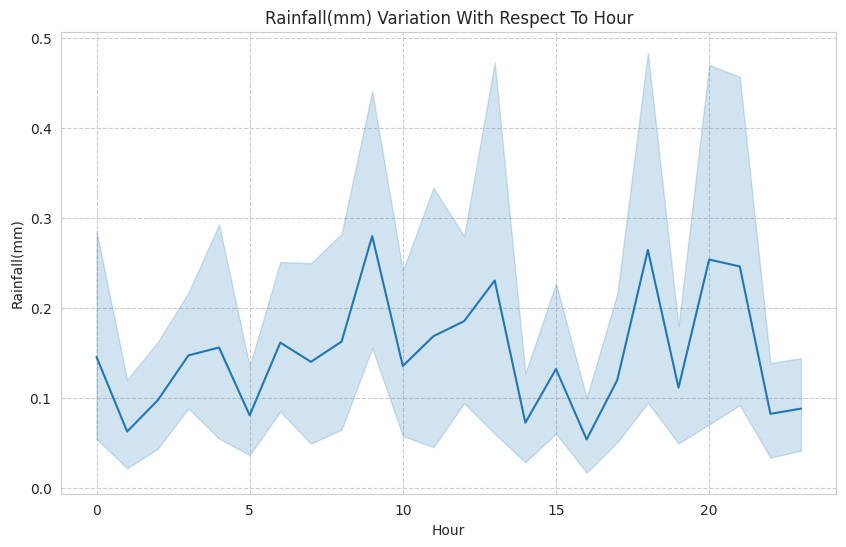

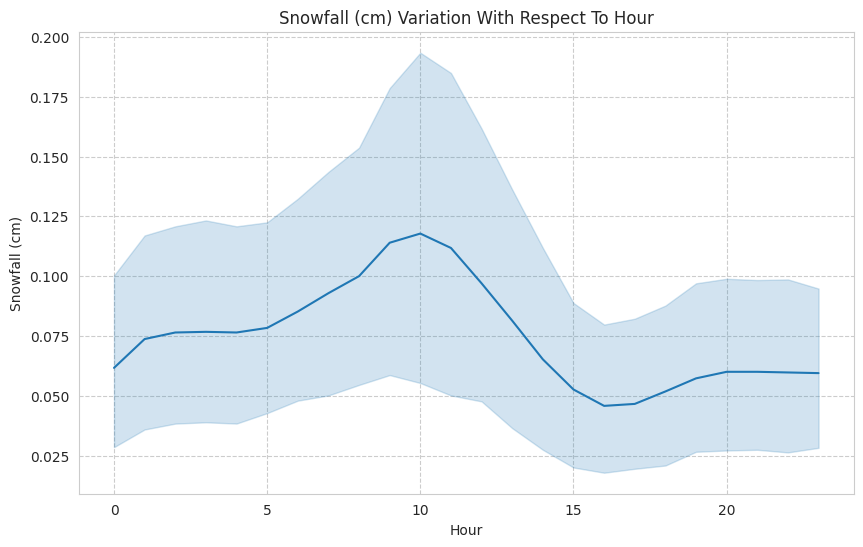

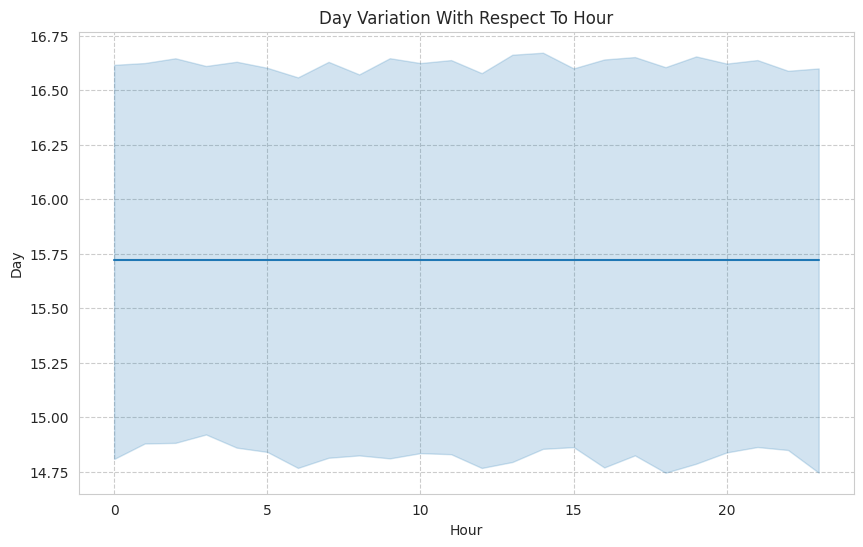

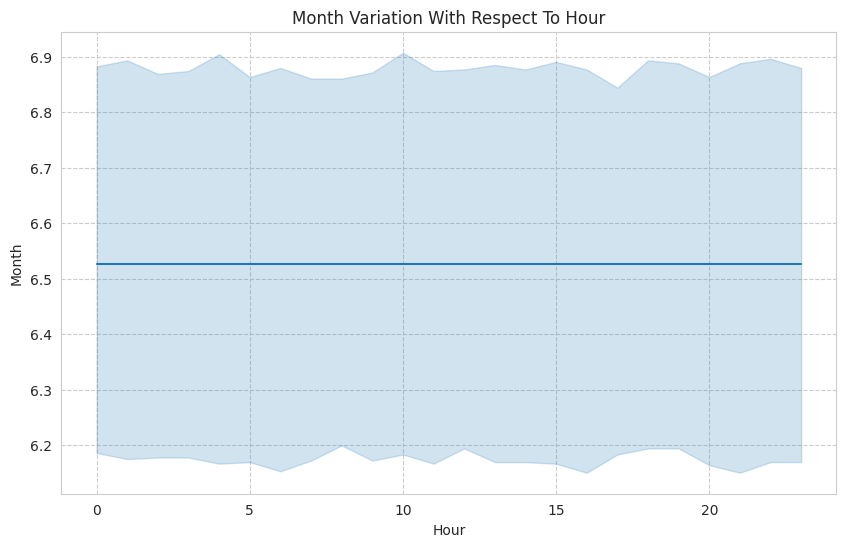

In [ ]:
# Spread of numerical variables across "Hour"
for i in numerical_variables:
    if i == 'Hour':
        continue
    else:
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=bike_df["Hour"], y=bike_df[i], data=bike_df)
        plt.title(f"{i} Variation With Respect To Hour")
        plt.xlabel("Hour")
        plt.ylabel(i)
        plt.show()

Observations:

* Throughout the day, the demand for rental bikes shows a distinct pattern, with the highest peak occurring in the evening and gradually decreasing thereafter. Notably, the demand reaches its peak at 8 AM and 6 PM, coinciding with typical office opening and closing times.

* Additionally, features such as temperature, wind speed, and solar radiation follow a similar trend, increasing throughout the day and reaching their peaks in the afternoon.

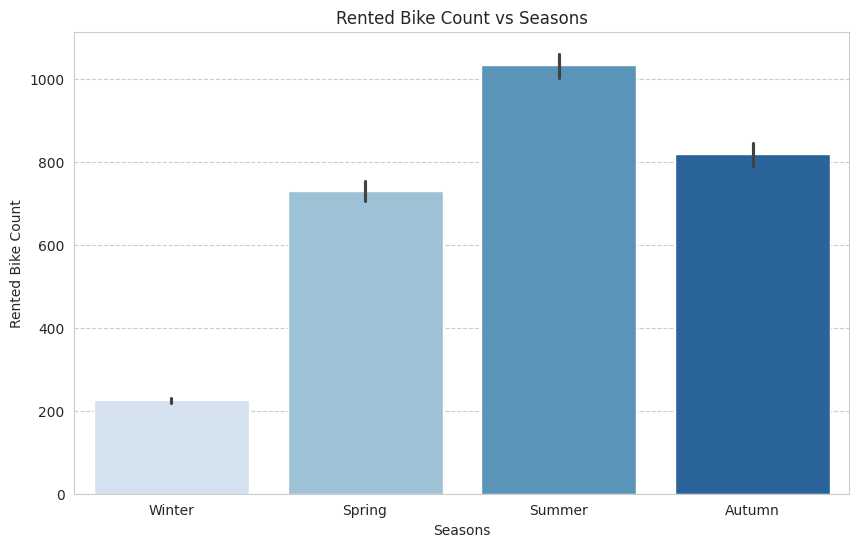

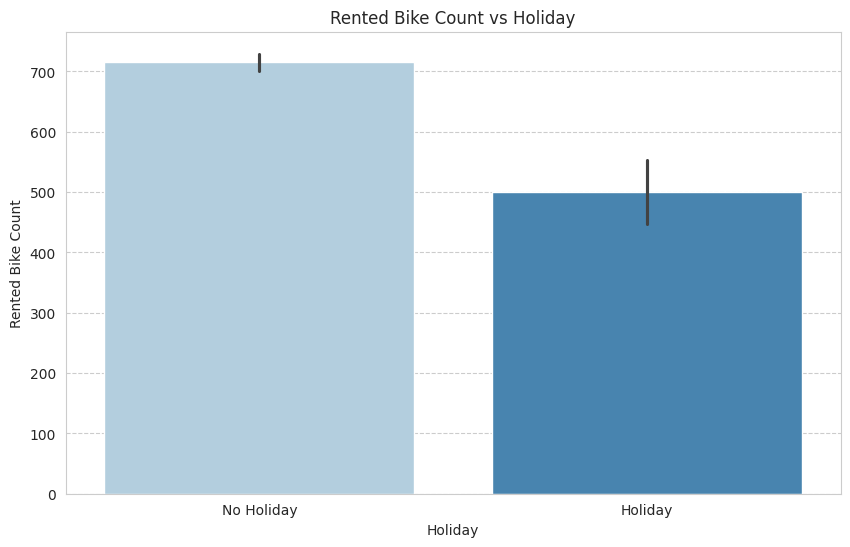

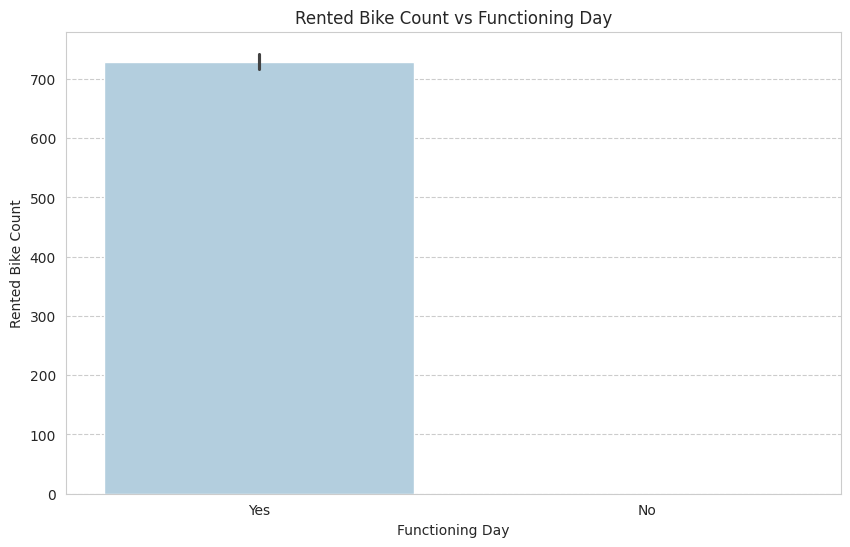

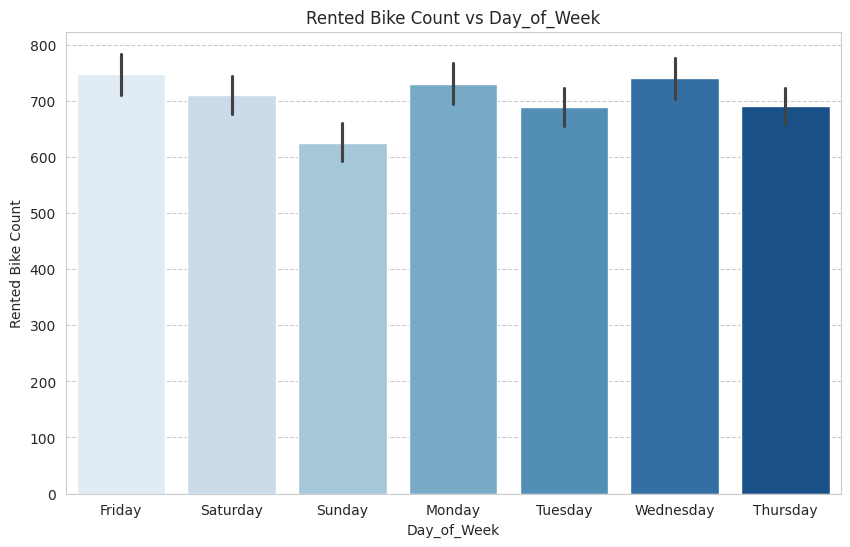

In [ ]:
# Barplot for each categorical variable against "Rented Bike Count"
for i in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=bike_df[i], y=bike_df['Rented Bike Count'], palette='Blues')
    plt.title(f"Rented Bike Count vs {i}")
    plt.xlabel(i)
    plt.ylabel("Rented Bike Count")
    plt.show()

Observations:

* During the summer season, we observe a higher demand for rented bikes, which can be attributed to the higher temperatures and increased solar radiation typical of this season.

* The presence of fewer holidays in the dataset correlates with a lower count of rented bikes on those days. Conversely, there is almost no demand for rented bikes on non-functioning days.

* Additionally, we notice a slight decrease in the demand for rental bikes on weekends, particularly on Saturdays and Sundays.

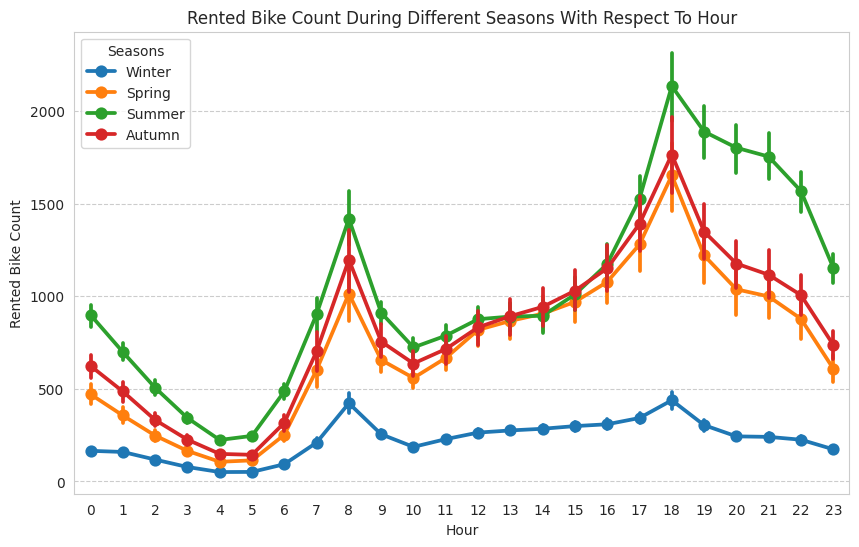

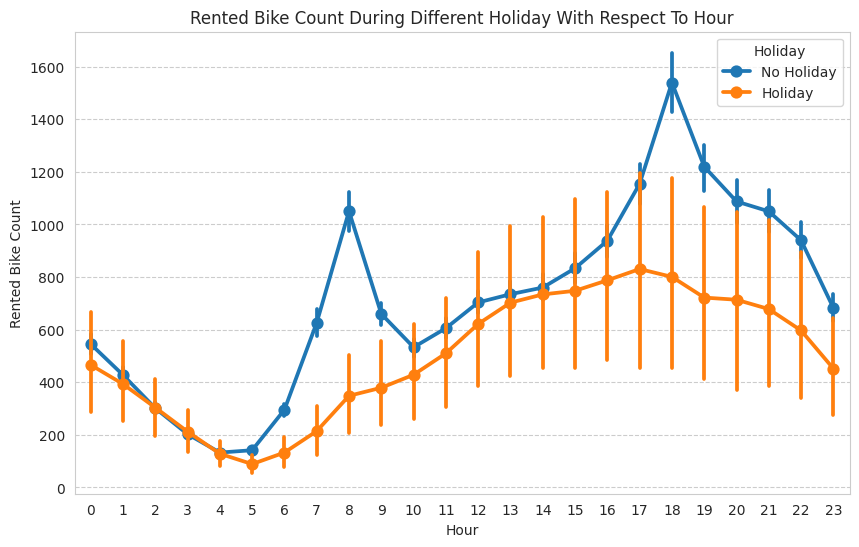

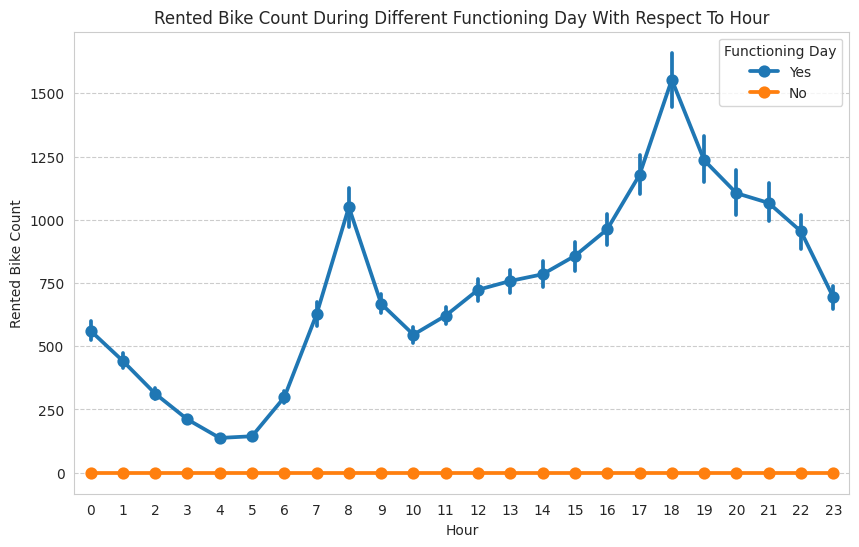

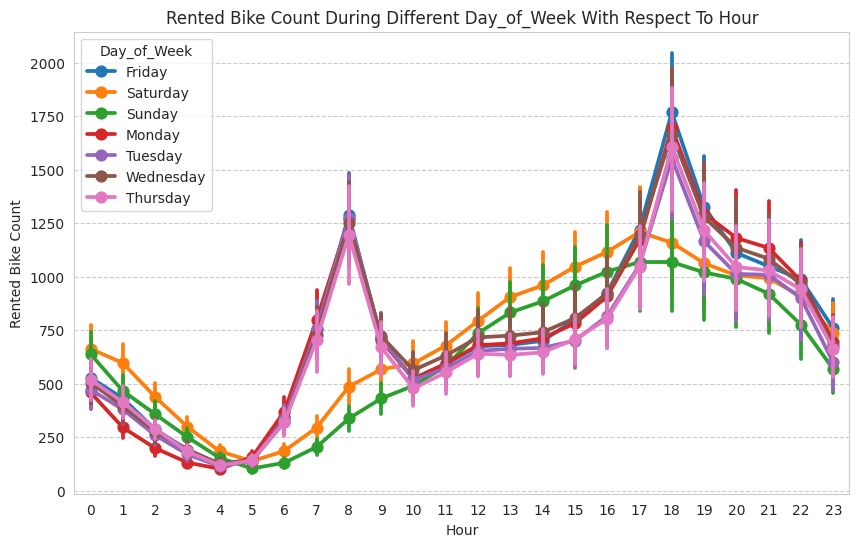

In [ ]:
# Point plots for Rented Bike Count during different categorical features with respect to Hour
for i in categorical_variables:
    if i == 'Hour':
        continue
    else:
        plt.figure(figsize=(10, 6))
        sns.pointplot(x=bike_df["Hour"], y=bike_df['Rented Bike Count'], hue=bike_df[i])
        plt.title(f"Rented Bike Count During Different {i} With Respect To Hour")
        plt.xlabel("Hour")
        plt.ylabel("Rented Bike Count")
        plt.show()

Observations:

* The demand for bikes is significantly lower during winter months compared to summer, indicating a strong seasonal trend.

* Throughout the week, the demand for bikes remains consistently high, with slightly lower demand observed on weekends, particularly on Sundays and Saturdays. However, demand peaks in the afternoon during weekends.

* In the "Functioning Day" column, the presence of a functioning day corresponds to bike demand. When there is no functioning day, there is no demand for bikes.

* Interestingly, non-holidays exhibit higher demand, possibly due to the presence of office days during the week.

## Feature Engineering

### Correlation

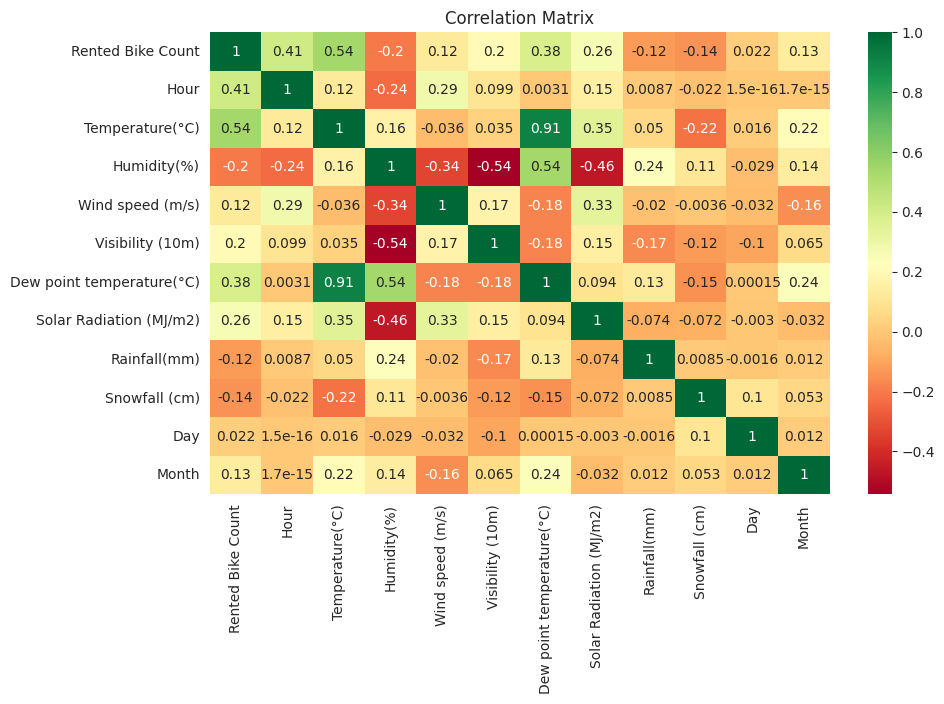

In [ ]:
# Correlation matrix
correlation_df = bike_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='RdYlGn')
plt.title("Correlation Matrix")
plt.show()

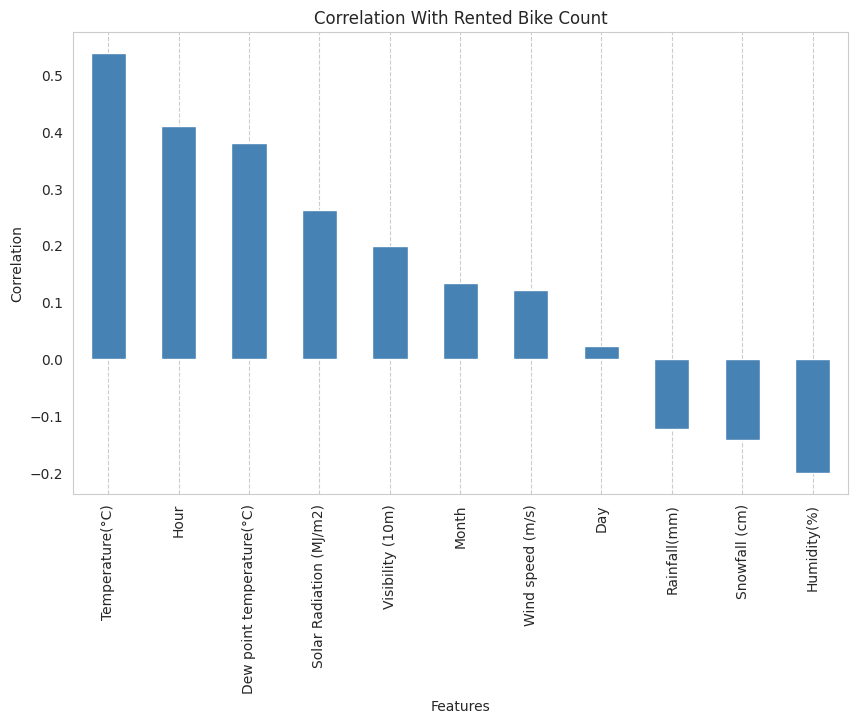

In [ ]:
# Bar plot of correlation with target variable
corr_target = bike_df.corr()['Rented Bike Count'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr_target[1:].plot(kind='bar', color='steelblue')
plt.title("Correlation With Rented Bike Count")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.grid(axis='y')
plt.show()

The features that exhibit the highest correlation with the rented bike count are:

* Hour
* Temperature (°C)
* Dew point temperature (°C)
* Solar radiation (MJ/m2)

Notably, temperature and dew point temperature are highly correlated at approximately 0.91, indicating a strong relationship between them. However, such high correlation values between predictors may lead to multicollinearity issues in the analysis.

### Multicolinearty Handling

In [ ]:
# Multicollinearity calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in X.

    Parameters:
    X (DataFrame): Input features.

    Returns:
    vif (DataFrame): DataFrame containing variables and their corresponding VIF scores.
    """

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

The Variance Inflation Factor (VIF) is a metric used to detect multicollinearity among independent variables in a regression analysis.

* VIF starts at 1 and has no upper limit. A VIF value of 1 indicates no multicollinearity, meaning the variable is not correlated with any other predictor variables.

* When the VIF exceeds 5 or 10, it suggests high multicollinearity between the independent variable and the other predictors. This indicates that the variable shares a strong linear relationship with one or more other predictors, potentially causing issues with the model's stability and interpretability.

In [ ]:
# Calling calculate_vif function
calculate_vif(bike_df[[col for col in numerical_variables]])

variables        VIF
0                        Hour   4.425960
1             Temperature(°C)  38.389623
2                 Humidity(%)   8.344305
3            Wind speed (m/s)   4.879565
4            Visibility (10m)   9.481423
5   Dew point temperature(°C)  19.815223
6     Solar Radiation (MJ/m2)   2.900819
7                Rainfall(mm)   1.082134
8               Snowfall (cm)   1.144168
9                         Day   4.292003
10                      Month   5.096115

High correlation and VIF values between Temperature(°C) and Dew point temperature(°C) can destabilize the entire regression model.

To address this issue, it's necessary to drop one of these features to reduce the VIF value and mitigate multicollinearity.

In [ ]:
# Excluding specific columns and calling calculate_vif function
calculate_vif(bike_df[[col for col in numerical_variables if col not in ['Dew point temperature(°C)' , 'Day' , 'Month']]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

Here, we can see all these feature VIF values got reduced to below 5!

In [ ]:
# Dropping 'Dew point temperature(°C)', 'Day', 'Month' columns
bike_df = bike_df.drop(['Dew point temperature(°C)', 'Day', 'Month'], axis=1)

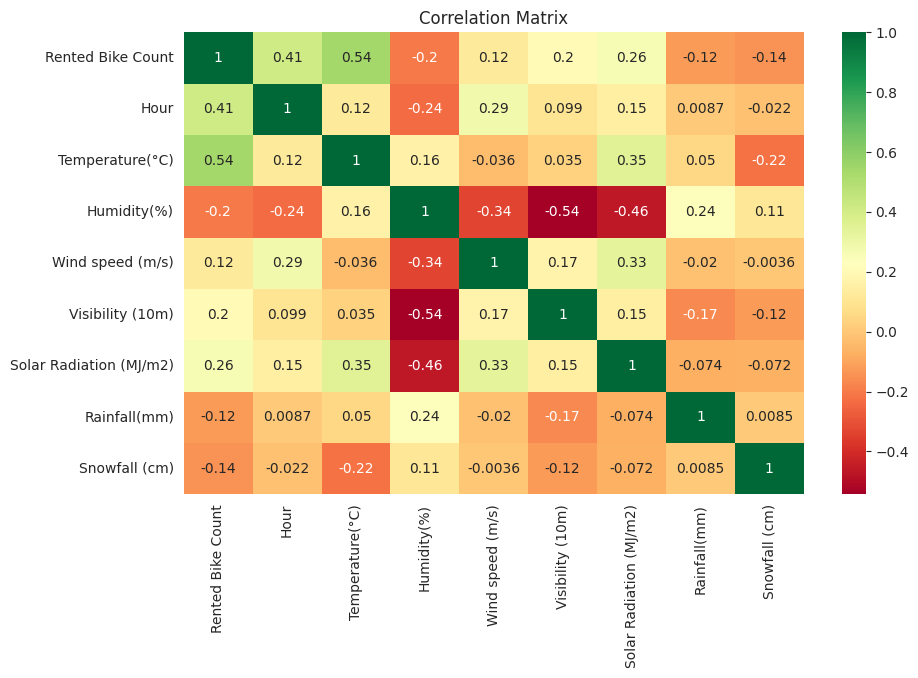

In [ ]:
# Correlation matrix visualization
correlation_df = bike_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='RdYlGn')
plt.title("Correlation Matrix")
plt.show()

### Feature Creation

In [ ]:
# Creating a column indicating if it's a weekend or not
bike_df['weekend'] = bike_df['Day_of_Week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

# Dropping 'Day_of_week' column
bike_df.drop('Day_of_Week', axis=1, inplace=True)

### Label Encoding

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoding = LabelEncoder()

# Apply label encoding to specified columns
columns_to_encode = ['Seasons', 'Holiday', 'Functioning Day']
bike_df[columns_to_encode] = bike_df[columns_to_encode].apply(label_encoding.fit_transform)

In [ ]:
# Review the first few rows of the dataframe after label encoding
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day  weekend  
0        3        1                1        0  
1        3        1                1        0  
2        3        1                1        0  
3        3        1                1        0  
4        3        1                1        0

### Identify Inputs & Targets

In [ ]:
# Separate input features (X) and target variable (Y)
X = bike_df.drop('Rented Bike Count', axis=1)
Y = np.sqrt(bike_df["Rented Bike Count"])

In [ ]:
# Check the shapes of input features (X) and target variable (Y)
X.shape, Y.shape

((8760, 12), (8760,))

We have a dataset consisting of 8760 data points and 12 features. Our goal is to predict the dependent variable 'Rented Bike Count'.

## Model Implementation

### Train Test Split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# Check the shapes of training and testing data
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6132, 12), (6132,), (2628, 12), (2628,))

### Linear Regression

In [ ]:
# Create an instance of the Linear Regression algorithm
linear_reg = LinearRegression()

# Fit the Linear Regression model
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predicting values of Y for test and train sets
Y_test_pred = linear_reg.predict(X_test)
Y_train_pred = linear_reg.predict(X_train)

In [ ]:
# Retrieve the intercept (Y-intercept) of the Linear Regression model
intercept = linear_reg.intercept_
intercept

-7.367857457543803

In [ ]:
# Retrieve the coefficients of the Linear Regression model
coefficients = linear_reg.coef_
coefficients

array([ 4.78038514e-01,  5.56795645e-01, -1.57744402e-01,  4.32489954e-02,
        4.02047244e-04, -9.92946769e-01, -1.53370616e+00,  1.57364803e-01,
       -2.13910221e+00,  3.42660904e+00,  2.88459521e+01, -1.45660899e+00])

In [ ]:
# Model evaluation scores

# Score for training data
train_score = linear_reg.score(X_train, Y_train)
print("Training Score:", train_score)

# Score for testing data
test_score = linear_reg.score(X_test, Y_test)
print("Testing Score:", test_score)

Training Score: 0.6540967727241054
Testing Score: 0.6501226505752835


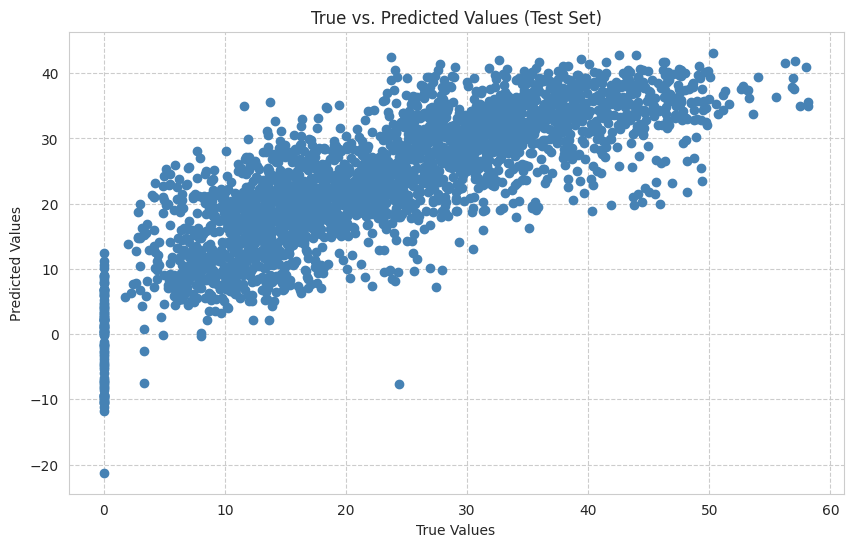

In [ ]:
# Scatter plot comparing true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='steelblue')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values (Test Set)")
plt.show()

#### Evaluation Metrics

In [ ]:
# Create dictionaries to store train and test evaluation metrics
train_result = {}
test_result = {}

# Define a function to calculate evaluation metrics
def evaluation_metrics(y_true, y_pred, model=None, train=True):
    # Calculate evaluation metrics
    MSE = round(mean_squared_error(y_true, y_pred), 2)
    print("MSE:", MSE)
    RMSE = round(np.sqrt(MSE), 2)
    print("RMSE:", RMSE)
    MAE = round(mean_absolute_error(y_true, y_pred), 2)
    print("MAE:", MAE)
    r2 = round(r2_score(y_true, y_pred), 2)
    print("R2:", r2)
    adj_r2 = round(1 - (1 - r2_score(y_true, y_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 2)
    print("Adjusted R2:", adj_r2)

    # Append results into dictionary
    if train:
        train_result[model] = [MSE, RMSE, MAE, r2, adj_r2]
    else:
        test_result[model] = [MSE, RMSE, MAE, r2, adj_r2]

In [ ]:
# Evaluate training data metrics
evaluation_metrics(Y_train, Y_train_pred, model='Linear', train=True)

MSE: 53.81
RMSE: 7.34
MAE: 5.64
R2: 0.65
Adjusted R2: 0.65


Now, let's visualize to check for heteroscedasticity, which refers to unequal variance or scatter in the residuals.

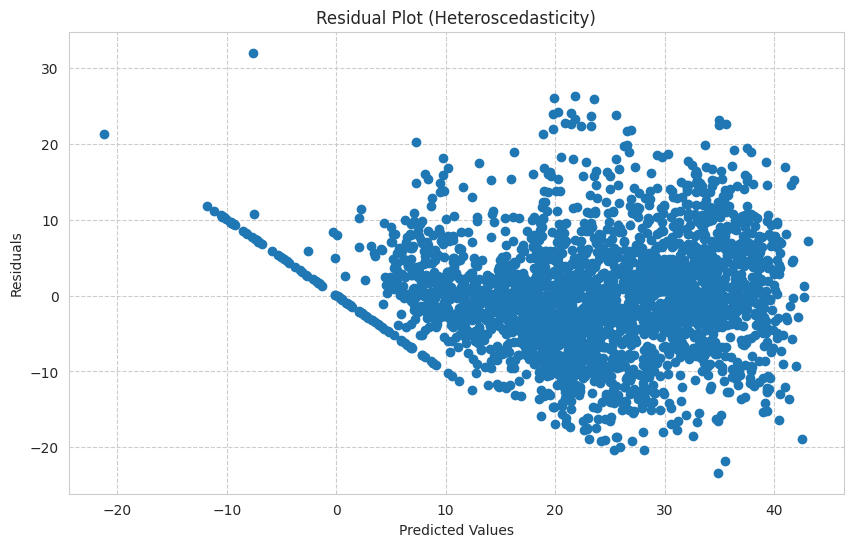

In [ ]:
# Plotting residuals to check for heteroscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_pred, Y_test - Y_test_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Heteroscedasticity)')
plt.show()

### Lasso Regression

In [ ]:
# Creating an instance of the Lasso algorithm
lasso = Lasso()

# Cross-validation
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [ ]:
# Print the best fit alpha value
print("The best fit alpha value:", lasso_regressor.best_params_)

The best fit alpha value: {'alpha': 0.0001}


In [ ]:
# Make predictions on the train and test datasets
train_pred_lasso = lasso_regressor.predict(X_train)
test_pred_lasso = lasso_regressor.predict(X_test)

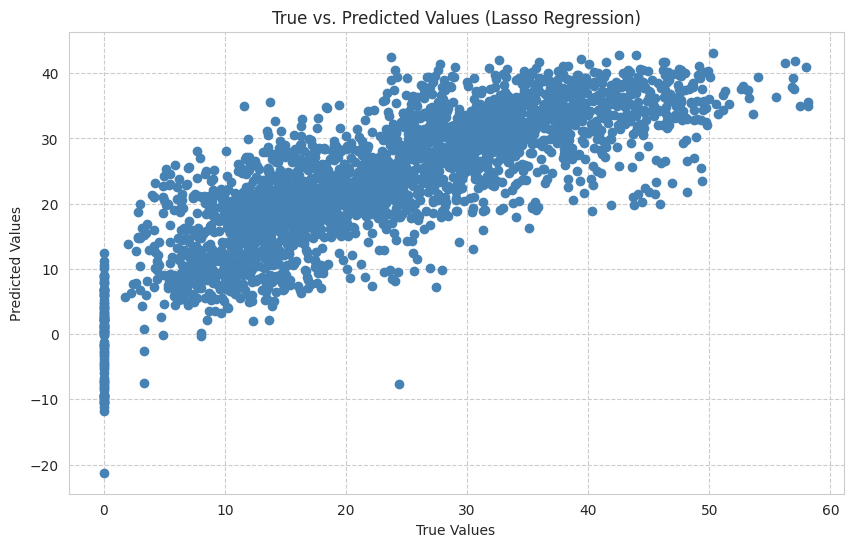

In [ ]:
# Scatter plot of true vs. predicted values using Lasso regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_pred_lasso, color='steelblue')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values (Lasso Regression)")
plt.show()

#### Evaluation Metrics

In [ ]:
# Evaluate training data metrics for Lasso regression
evaluation_metrics(Y_train, train_pred_lasso, 'Lasso', train=True)

MSE: 53.81
RMSE: 7.34
MAE: 5.64
R2: 0.65
Adjusted R2: 0.65


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test, test_pred_lasso, 'Lasso', train=False)

MSE: 53.74
RMSE: 7.33
MAE: 5.66
R2: 0.65
Adjusted R2: 0.65


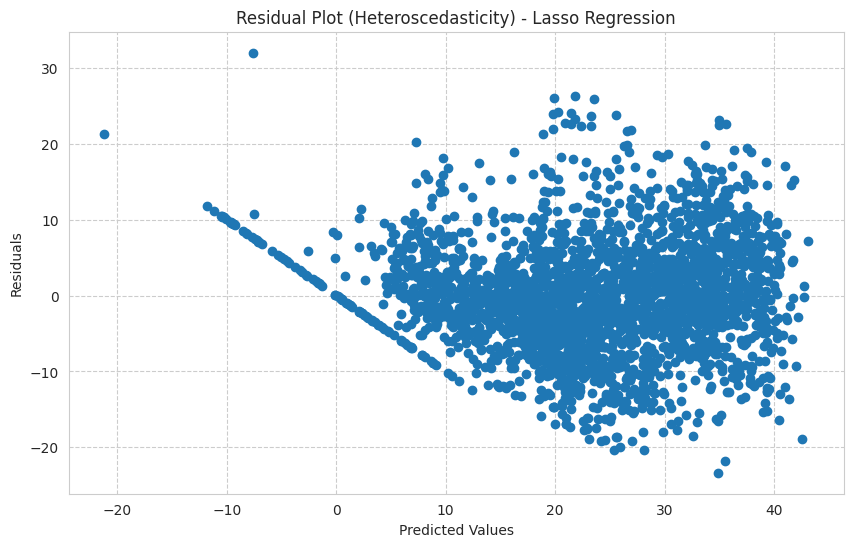

In [ ]:
# Plotting residuals to check for heteroscedasticity for Lasso regression
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_lasso, Y_test - test_pred_lasso)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Heteroscedasticity) - Lasso Regression')
plt.show()

### Ridge Regression

In [ ]:
# Create an instance of Ridge algorithm
ridge = Ridge()

# Define parameters for cross-validation
parameters_ridge = {'alpha': [1e-10, 1e-5, 1e-4, 1e-3, 1e-2, 0.5, 1, 1.5, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60, 100]}

# Perform grid search cross-validation
ridge_regressor = GridSearchCV(ridge, parameters_ridge, cv=5)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.5, 1,
                                   1.5, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60,
                                   100]})

In [ ]:
# Print the best fit alpha value
print("The best fit alpha value:", ridge_regressor.best_params_)

The best fit alpha value: {'alpha': 1e-10}


In [ ]:
# Predictions on train and test datasets using Ridge regression
train_ridge_pred = ridge_regressor.predict(X_train)
test_ridge_pred = ridge_regressor.predict(X_test)

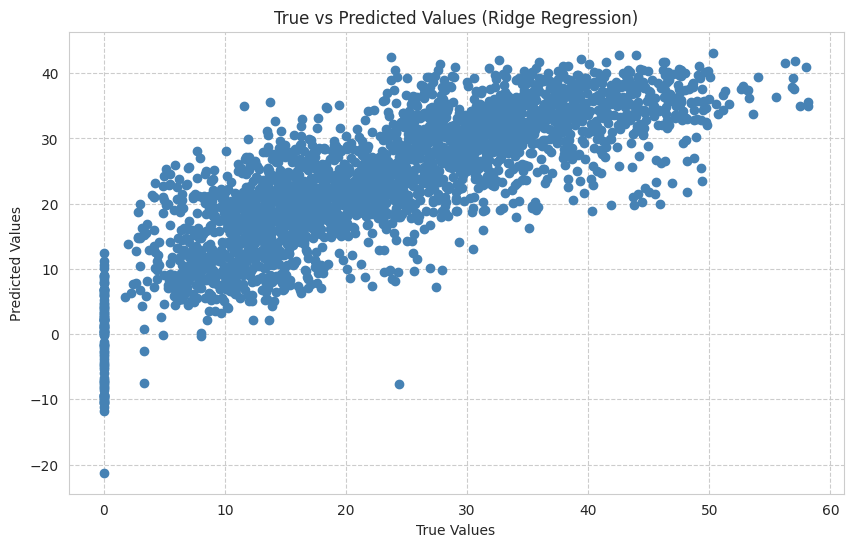

In [ ]:
# Scatter plot of true vs predicted values for Ridge regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_ridge_pred, color='steelblue')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Ridge Regression)")
plt.show()

#### Evaluation Metrics

In [ ]:
# Evaluate the performance of Ridge regression on training data
evaluation_metrics(Y_train, train_ridge_pred, model='Ridge', train=True)

MSE: 53.81
RMSE: 7.34
MAE: 5.64
R2: 0.65
Adjusted R2: 0.65


In [ ]:
# Evaluate the performance of Ridge regression on test data
evaluation_metrics(Y_test, test_ridge_pred, model='Ridge', train=False)

MSE: 53.74
RMSE: 7.33
MAE: 5.66
R2: 0.65
Adjusted R2: 0.65


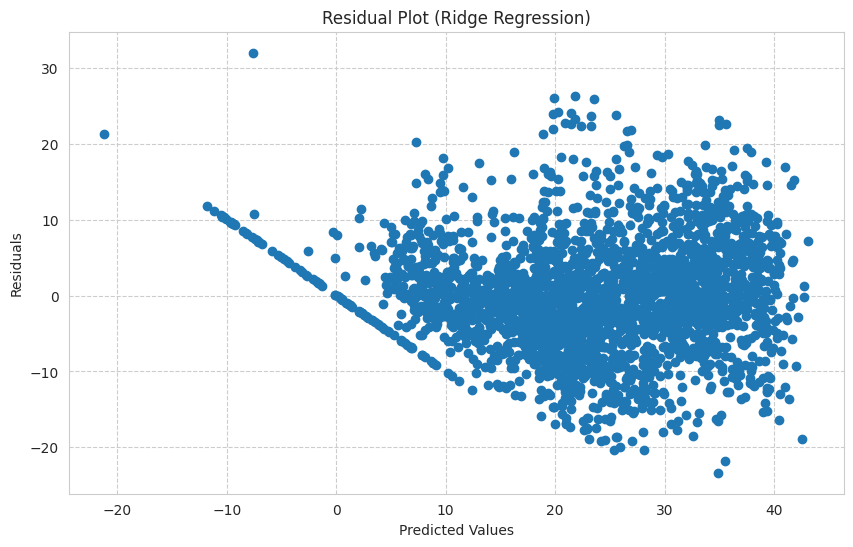

In [ ]:
# Heteroscedasticity - Residual plot for Ridge regression
plt.figure(figsize=(10, 6))
plt.scatter(test_ridge_pred, Y_test - test_ridge_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression)')
plt.show()

### Random Forest Regressor

In [ ]:
# Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Hyperparameter grid for Random Forest
param_dict_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 6, 7],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
}

In [ ]:
# Create RandomForestRegressor object
rf_model = RandomForestRegressor()

# Perform grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid=param_dict_rf,
                       cv=5, verbose=2)

# Fit the grid search to find the best parameters
rf_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# Get the best parameters
best_params_rf = rf_grid.best_params_
print("Best parameters for Random Forest:", best_params_rf)

Best parameters for Random Forest: {'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Get the optimal model
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
# Calculate the model score on the training set
rf_train_score = rf_optimal_model.score(X_train, Y_train)
rf_train_score

0.8566632967004455

In [ ]:
# Making predictions on the training and testing data
train_pred_rf = rf_optimal_model.predict(X_train)
test_pred_rf = rf_optimal_model.predict(X_test)

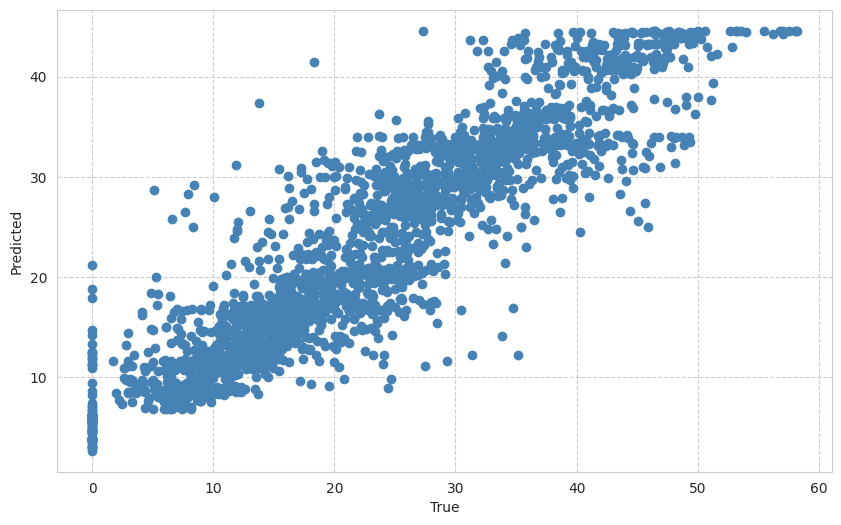

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_pred_rf, color='steelblue')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

#### Evaluation Metrics

In [ ]:
# Train data Evaluation metrics
evaluation_metrics(Y_train, train_pred_rf, 'Random Forest', train=True)

MSE: 22.3
RMSE: 4.72
MAE: 3.41
R2: 0.86
Adjusted R2: 0.86


In [ ]:
# Test data Evaluation metrics
evaluation_metrics(Y_test, test_pred_rf, 'Random Forest', train=False)

MSE: 25.03
RMSE: 5.0
MAE: 3.62
R2: 0.84
Adjusted R2: 0.84


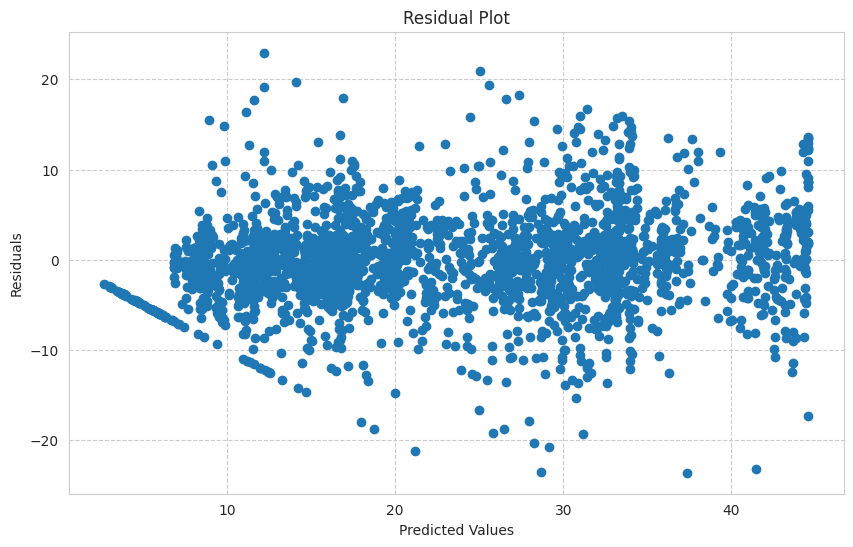

In [ ]:
# Heteroscedasticity - Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_rf, Y_test - test_pred_rf)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Gradient Boosting Regressor

In [ ]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Hyperparameter Grid for Gradient Boosting Regressor
gb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 6, 7],
    'min_samples_split': [50, 80],
    'min_samples_leaf': [40, 50]
}

In [ ]:
# Create an instance of Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=gb_params,
                       cv=3, verbose=2, scoring='neg_mean_squared_error')

gb_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   2.4s
[CV] END max_depth=5, m

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# best parameters
gb_grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [ ]:
# Best estimator
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# Model score on training data
gb_optimal_model.score(X_train, Y_train)

0.9683565480073958

In [ ]:
# Making predictions on train and test data
train_pred_gb = gb_optimal_model.predict(X_train)
test_pred_gb = gb_optimal_model.predict(X_test)

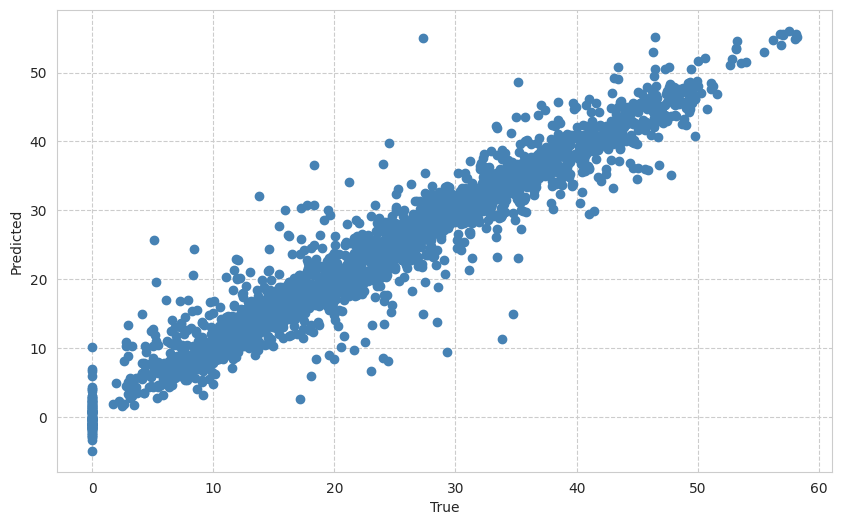

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_pred_gb, color='steelblue')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

#### Evaluation Metrics

In [ ]:
# Train data evaluation metrics
evaluation_metrics(Y_train, train_pred_gb, 'Gradient Boosting', train=True)


MSE: 4.92
RMSE: 2.22
MAE: 1.49
R2: 0.97
Adjusted R2: 0.97


In [ ]:
# Test data evaluation metrics
evaluation_metrics(Y_test, test_pred_gb, 'Gradient Boosting', train=False)

MSE: 10.23
RMSE: 3.2
MAE: 2.1
R2: 0.93
Adjusted R2: 0.93


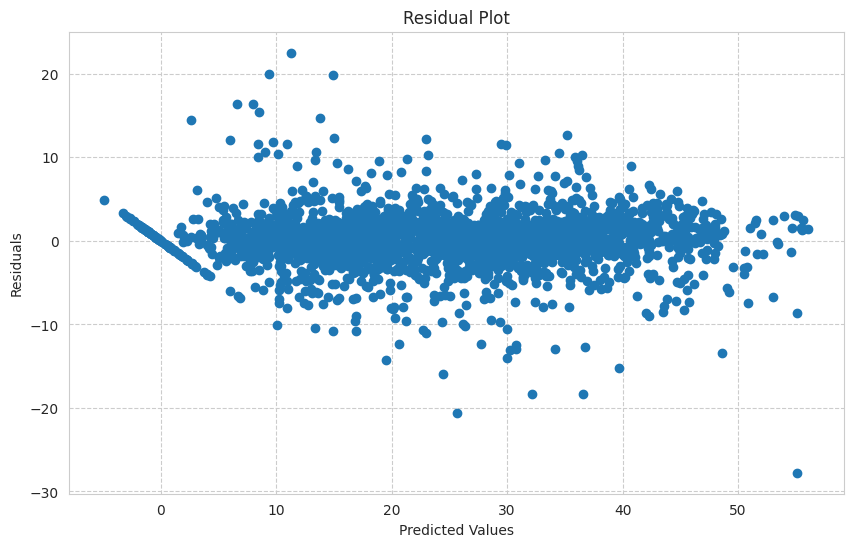

In [ ]:
# Heteroscedasticity - Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_gb, Y_test - test_pred_gb)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Model Explainability

In [ ]:
# Important features
importances = rf_optimal_model.feature_importances_
importance_dict = {'Feature': list(X_train.columns),
                  'Feature Importance': importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# Rounding off feature importance
importance_df['Feature Importance'] = round(importance_df['Feature Importance'], 2)

In [ ]:
# Sorting values by feature importance
importance_df.sort_values(by=['Feature Importance'], ascending=False)

Feature  Feature Importance
1           Temperature(°C)                0.31
0                      Hour                0.27
10          Functioning Day                0.15
2               Humidity(%)                0.11
6              Rainfall(mm)                0.06
8                   Seasons                0.06
5   Solar Radiation (MJ/m2)                0.03
11                  weekend                0.01
3          Wind speed (m/s)                0.00
4          Visibility (10m)                0.00
7             Snowfall (cm)                0.00
9                   Holiday                0.00

In [ ]:
# Fitting the model
rf_optimal_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=50)

In [ ]:
# Sort the feature importances
features = X_train.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

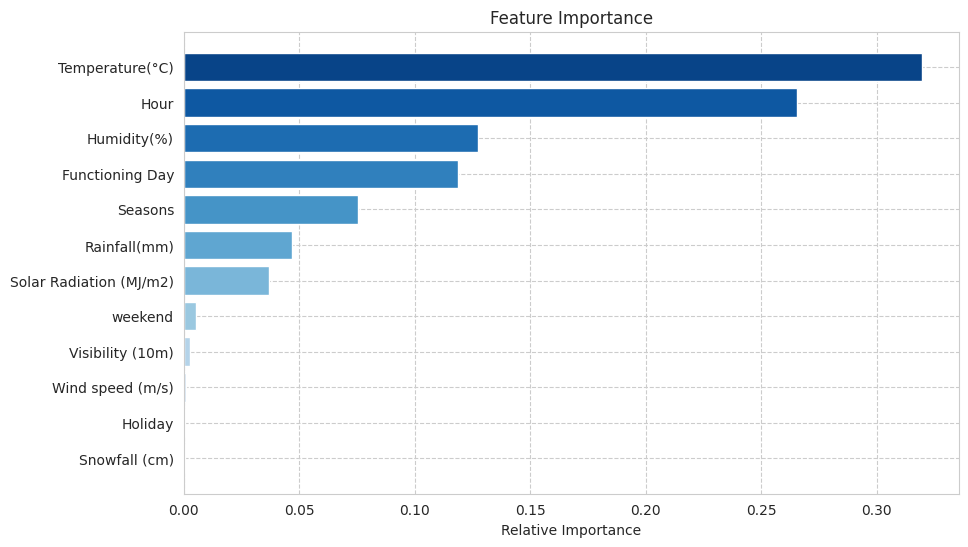

In [ ]:
# Plot the figure
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
palette = sns.color_palette("Blues", len(indices))
plt.barh(range(len(indices)), importances[indices], color=palette, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

"Temperature" and "Hour" exhibit the most significant importance among all features, indicating their substantial influence on varying the count of rented bikes.

### Feature Importance

In [ ]:
# Important features
importances = gb_optimal_model.feature_importances_
importance_dict = {'Feature': list(X_train.columns), 'Feature Importance': importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# Rounding off feature importance values
importance_df['Feature Importance'] = round(importance_df['Feature Importance'], 2)

In [ ]:
# Sorting feature importance values in descending order
importance_df.sort_values(by='Feature Importance', ascending=False)

Feature  Feature Importance
1           Temperature(°C)                0.28
0                      Hour                0.25
10          Functioning Day                0.15
2               Humidity(%)                0.12
6              Rainfall(mm)                0.06
8                   Seasons                0.06
5   Solar Radiation (MJ/m2)                0.04
11                  weekend                0.02
4          Visibility (10m)                0.01
3          Wind speed (m/s)                0.00
7             Snowfall (cm)                0.00
9                   Holiday                0.00

In [ ]:
# Fitting the Gradient Boosting model
gb_optimal_model.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=200)

In [ ]:
# Sorting features by importance
features = X_train.columns
importances = gb_optimal_model.feature_importances_
indices = np.argsort(importances)

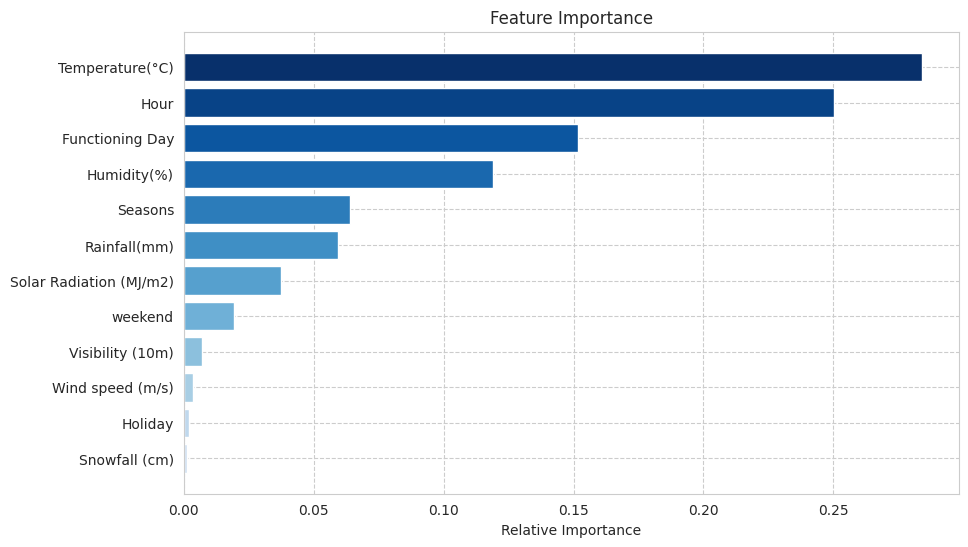

In [ ]:
# Plotting the feature importance
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
colors = plt.cm.Blues(np.linspace(0.2, 1, len(indices)))
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Results

In [ ]:
# Training results of evaluation metrics
results_train_df = pd.DataFrame(train_result).T.reset_index()
results_train_df.columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
results_train_df

Model    MSE  RMSE   MAE  R2 score  Adjusted R2
0             Linear  53.81  7.34  5.64      0.65         0.65
1              Lasso  53.81  7.34  5.64      0.65         0.65
2              Ridge  53.81  7.34  5.64      0.65         0.65
3      Random Forest  22.30  4.72  3.41      0.86         0.86
4  Gradient Boosting   4.92  2.22  1.49      0.97         0.97

In [ ]:
#Testing results of evaluation metrics
test_results_df= pd.DataFrame(test_result).T.reset_index()
test_results_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
test_results_df

Model    MSE  RMSE   MAE  R2 score  Adjusted R2
0              Lasso  53.74  7.33  5.66      0.65         0.65
1              Ridge  53.74  7.33  5.66      0.65         0.65
2      Random Forest  25.03  5.00  3.62      0.84         0.84
3  Gradient Boosting  10.23  3.20  2.10      0.93         0.93

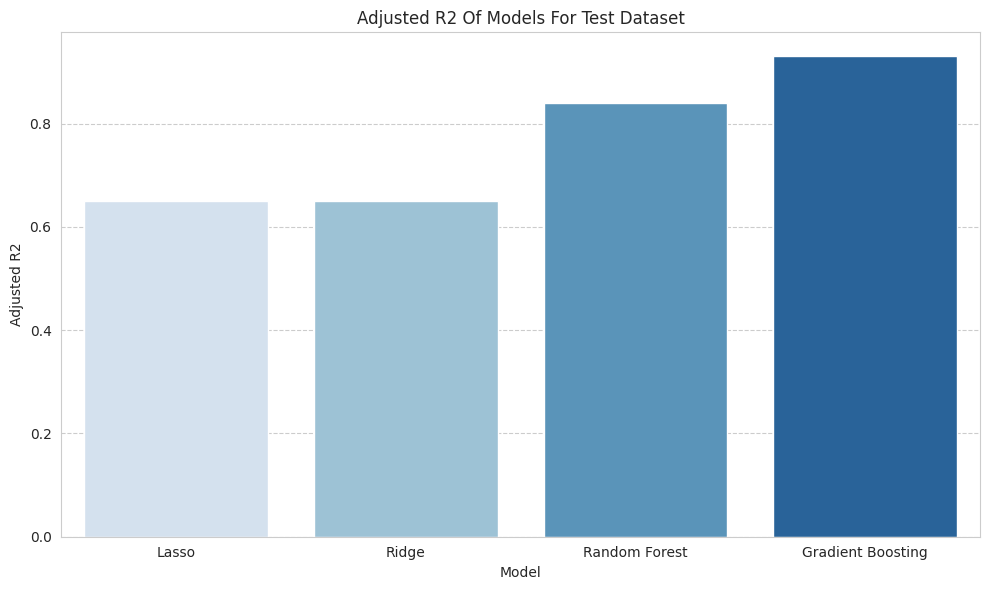

In [ ]:
# Plot Adjusted R2 of models for test dataset
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Adjusted R2', data=test_results_df, palette="Blues")
plt.title("Adjusted R2 Of Models For Test Dataset")
plt.tight_layout()

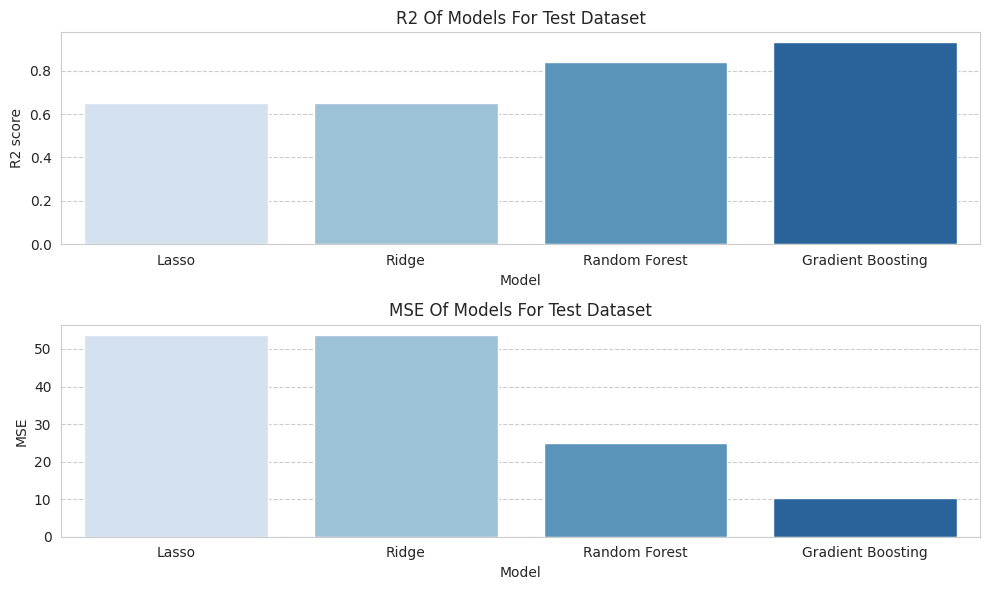

In [ ]:
# Plot R2 and MSE of models for test dataset
fig, ax = plt.subplots(2, figsize=(10, 6))
sns.barplot(x='Model', y='R2 score', data=test_results_df, palette="Blues", ax=ax[0])
ax[0].set_title("R2 Of Models For Test Dataset")

sns.barplot(x='Model', y='MSE', data=test_results_df, palette="Blues", ax=ax[1])
ax[1].set_title("MSE Of Models For Test Dataset")

plt.tight_layout()
plt.show()

# Conclusion

During our analysis, we began by cleaning the data and conducting exploratory data analysis (EDA) on all the features in our dataset. Initially, we focused on the dependent variable 'Rented Bike count', applying transformations as needed. Following this, we delved into the analysis of independent variables, encompassing both numerical and categorical features. This involved conducting univariate and bivariate analyses to gain insights into their individual and joint distributions.

Further, we scrutinized the numerical variables, examining their correlations and relationships with the dependent variable. To address multicollinearity, we utilized the Variance Inflation Factor (VIF). Additionally, we applied Label Encoding to categorical variables, facilitating their inclusion in our analysis.

For predictive modeling, we employed five machine learning algorithms: Linear Regression, Lasso, Ridge, Random Forest, and Gradient Boosting. To optimize their performance, we conducted hyperparameter tuning. This comprehensive approach aimed to enhance the accuracy and robustness of our models for predicting bike rental counts.

**Key Insights from the Analysis:**

* The Gradient Boosting Regressor model demonstrated promising results, exhibiting the highest R-squared and Adjusted R-squared values along with the lowest MSE and RMSE. This indicates its effectiveness in addressing the problem at hand, suggesting its suitability for further exploration and application.

* The analysis reveals a significant surge in bike rentals during the summer season, contrasting sharply with the reduced demand observed during winter.

* Interestingly, bike demand appears to be higher on clear days compared to snowy or rainy days, suggesting a preference for favorable weather conditions among renters.

* Moreover, there is a noticeable spike in bike demand within the temperature range of 22 to 25°C, indicating a preferred temperature range for biking activities.





